In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#reading the dataset as a CSV file
df = pd.read_csv("Dataset.csv")
var_def = pd.read_csv("Variable Definition.csv")

In [3]:
#getting the dimension of the dataset
df.shape

(192, 23)

In [4]:
#to see the top 5 rows of the dataset
df.head()

,school,schtype,sex,age,foccup,moccup,famstatus,fqual,mqual,textbook,...,lessontime,weeklytime,private,android,extracurricular,assignment,parentshelp,friendshelp,video,score
0,1,Private,Male,14.0,Engineering,Teaching,Monogamy,B.SC/HND,B.Sc/HND,Yes,...,Before breaktime,4,No,Yes,Yes,Always,Sometimes,Sometimes,Sometimes,13
1,1,Private,Male,15.0,Health,Others,Polygamy,Masters,B.Sc/HND,Yes,...,NaN,4,Yes,Yes,Yes,Sometimes,Sometimes,Sometimes,Sometimes,12
2,1,Private,Male,12.0,Others,Teaching,Polygamy,B.SC/HND,Masters,No,...,Before breaktime,4,No,Yes,Yes,Sometimes,Sometimes,Sometimes,Sometimes,19
3,1,Private,Male,13.0,Business,Others,Monogamy,Masters,Masters,Yes,...,Before breaktime,4,No,Yes,Yes,Always,Never,Sometimes,Sometimes,12
4,1,Private,Male,13.0,Others,Business,NaN,Ph.D,Masters,Yes,...,Before breaktime,4,No,Yes,Yes,Always,Sometimes,Sometimes,Sometimes,9


In [5]:
#statistical distribution of the features
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,192.0,NaN,NaN,NaN,2.869792,1.398849,1.0,2.0,3.0,4.0,5.0
schtype,192,2,Private,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,186,2,Male,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,185.0,NaN,NaN,NaN,14.243243,1.193401,10.0,14.0,14.0,15.0,17.0
foccup,188,5,Business,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moccup,189,5,Business,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famstatus,188,4,Monogamy,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fqual,155,6,Masters,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mqual,160,6,Masters,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
textbook,192,2,Yes,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#quality of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           192 non-null    int64  
 1   schtype          192 non-null    object 
 2   sex              186 non-null    object 
 3   age              185 non-null    float64
 4   foccup           188 non-null    object 
 5   moccup           189 non-null    object 
 6   famstatus        188 non-null    object 
 7   fqual            155 non-null    object 
 8   mqual            160 non-null    object 
 9   textbook         192 non-null    object 
 10  style            190 non-null    object 
 11  timetoschool     190 non-null    object 
 12  personalstudy    185 non-null    object 
 13  lessontime       176 non-null    object 
 14  weeklytime       192 non-null    int64  
 15  private          188 non-null    object 
 16  android          189 non-null    object 
 17  extracurricular 

In [7]:
#to see the column names
df.columns

Index(['school', 'schtype', 'sex', 'age', 'foccup', 'moccup', 'famstatus',
       'fqual', 'mqual', 'textbook', 'style', 'timetoschool', 'personalstudy',
       'lessontime', 'weeklytime', 'private', 'android', 'extracurricular',
       'assignment', 'parentshelp', 'friendshelp', 'video', 'score'],
      dtype='object')

In [8]:
df["age"].isnull().sum()/len(df)
#df["age"].isna()

0.036458333333333336

In [9]:
#The target feature score will be converted to 100. 
df["score"] = df["score"] * 4

In [10]:
#Percentage of Missing Values
cols = df.columns
cols
for i in cols:
    print("{} has {}% missing values". format(i, round(df[i].isnull().sum()/len(df) * 100, 2)))
    print('*' * 60)

school has 0.0% missing values
************************************************************
schtype has 0.0% missing values
************************************************************
sex has 3.12% missing values
************************************************************
age has 3.65% missing values
************************************************************
foccup has 2.08% missing values
************************************************************
moccup has 1.56% missing values
************************************************************
famstatus has 2.08% missing values
************************************************************
fqual has 19.27% missing values
************************************************************
mqual has 16.67% missing values
************************************************************
textbook has 0.0% missing values
************************************************************
style has 1.04% missing values
******************************************

In [11]:
#to see columns with missing values
mis_cols = df.columns[df.isnull().any()]
mis_cols

Index(['sex', 'age', 'foccup', 'moccup', 'famstatus', 'fqual', 'mqual',
       'style', 'timetoschool', 'personalstudy', 'lessontime', 'private',
       'android', 'assignment', 'parentshelp', 'friendshelp', 'video'],
      dtype='object')

In [12]:
#to know the amount of unique values in the features
for i in cols:
    print("{} has {} unique values". format(i, len(df[i].unique())))
    print('*' * 60)

school has 5 unique values
************************************************************
schtype has 2 unique values
************************************************************
sex has 3 unique values
************************************************************
age has 8 unique values
************************************************************
foccup has 6 unique values
************************************************************
moccup has 6 unique values
************************************************************
famstatus has 5 unique values
************************************************************
fqual has 7 unique values
************************************************************
mqual has 7 unique values
************************************************************
textbook has 2 unique values
************************************************************
style has 3 unique values
************************************************************
timetoschool has 5 unique values
**

In [13]:
#to see the unique values in the features
print("_" * 70)
for i in cols:
    print("{} has the following values and counts".format(i))
    print(df[i].value_counts())
    print('*' * 60)

______________________________________________________________________
school has the following values and counts
3    46
2    44
1    40
5    37
4    25
Name: school, dtype: int64
************************************************************
schtype has the following values and counts
Private    109
Public      83
Name: schtype, dtype: int64
************************************************************
sex has the following values and counts
Male      94
Female    92
Name: sex, dtype: int64
************************************************************
age has the following values and counts
14.0    73
15.0    39
13.0    35
16.0    21
12.0     9
17.0     7
10.0     1
Name: age, dtype: int64
************************************************************
foccup has the following values and counts
Business       72
Others         54
Engineering    50
Health          6
Teaching        6
Name: foccup, dtype: int64
************************************************************
moccup has the follow

In [14]:
#to check for duplicate rows
df.duplicated().sum()

1

# Filling Missing Values

In [15]:
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('There are {0} numerical feature and {1} categorical feature'.format(numerical_data.shape[1], categorical_data.shape[1]))

# Fill missing categorical_data values with mode
for col in categorical_data:
        categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

# Fill missing numeric_data values with mean
for col in numerical_data:
        numerical_data[col].fillna(numerical_data[col].mean(), inplace=True)

df = pd.concat([numerical_data, categorical_data], axis=1)

There are 4 numerical feature and 19 categorical feature


In [16]:
# Displaying the merged data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           192 non-null    int64  
 1   age              192 non-null    float64
 2   weeklytime       192 non-null    int64  
 3   score            192 non-null    int64  
 4   schtype          192 non-null    object 
 5   sex              192 non-null    object 
 6   foccup           192 non-null    object 
 7   moccup           192 non-null    object 
 8   famstatus        192 non-null    object 
 9   fqual            192 non-null    object 
 10  mqual            192 non-null    object 
 11  textbook         192 non-null    object 
 12  style            192 non-null    object 
 13  timetoschool     192 non-null    object 
 14  personalstudy    192 non-null    object 
 15  lessontime       192 non-null    object 
 16  private          192 non-null    object 
 17  android         

The missing values have been filled

# Univariate Analysis

In [17]:
#amount of student samples from each school
df["school"].value_counts()

3    46
2    44
1    40
5    37
4    25
Name: school, dtype: int64

Score Analysis

In [18]:
#mean score of the students
df["score"].mean()

54.645833333333336

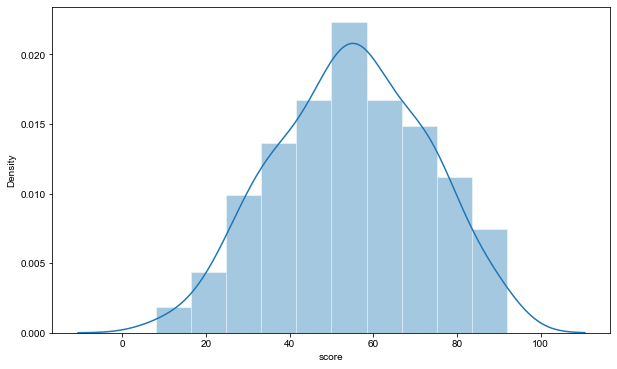

In [19]:
#distribution plot for the score feature
fig = plt.figure(figsize=(10,6))
plt.xlabel("Score")
sns.set(rc={"axes.labelsize": 30})
sns.distplot(df["score"])
plt.savefig('score distribution.png')

<AxesSubplot:xlabel='score', ylabel='count'>

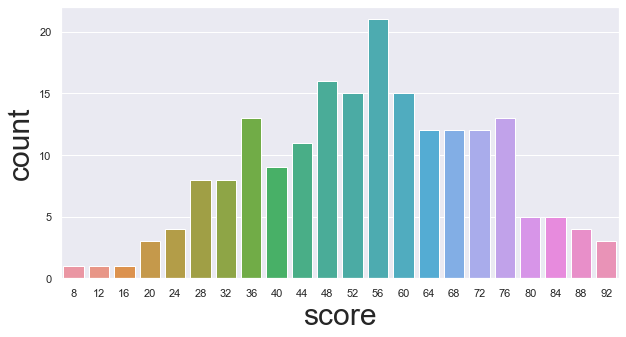

In [20]:
#distribution plot for the score feature
fig = plt.figure(figsize=(10,5))
plt.yticks([0, 5, 10, 15, 20])
plt.xlim(0, 102)
sns.countplot(df["score"])
#plt.xticks(np.arange(0,104,4))

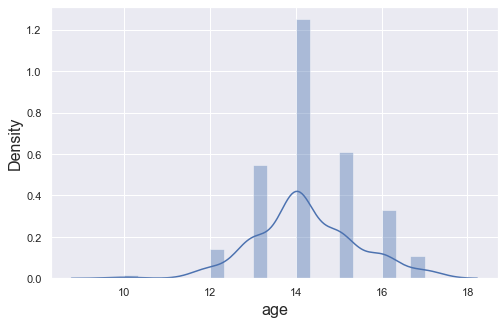

In [21]:
#distribution plot for the age feature
fig = plt.figure(figsize=(8,5))
sns.set(rc={"axes.labelsize": 16})
sns.distplot(df["age"])
plt.savefig("age.png")

In [22]:
#mode and mean of the age and score respectively
print(df["age"].mode())
print(df["score"].mean())

0    14.0
Name: age, dtype: float64
54.645833333333336


Gender Analysis

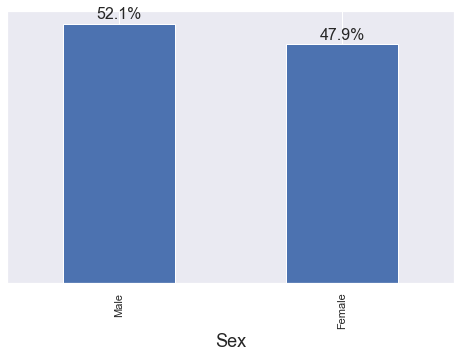

In [23]:
#Amount of Males and Females shown graphically
fig = plt.figure(figsize=(8,5))
ax = df["sex"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=16)

# Remove y axis
ax.get_yaxis().set_visible(False)

# Increase the size of the x-label
ax.set_xlabel("Sex", fontsize=18)

plt.savefig("gender.png")

In [24]:
#features were grouped for easy and clear visualisations
fam_cols = ["foccup", "moccup", "famstatus", "fqual", "mqual"]
stu_cols = ["textbook", "style", "private",
            "android", "parentshelp", "friendshelp", "video"]
sch_cols = ["schtype", "lessontime", "weeklytime", "extracurricular", "assignment"]

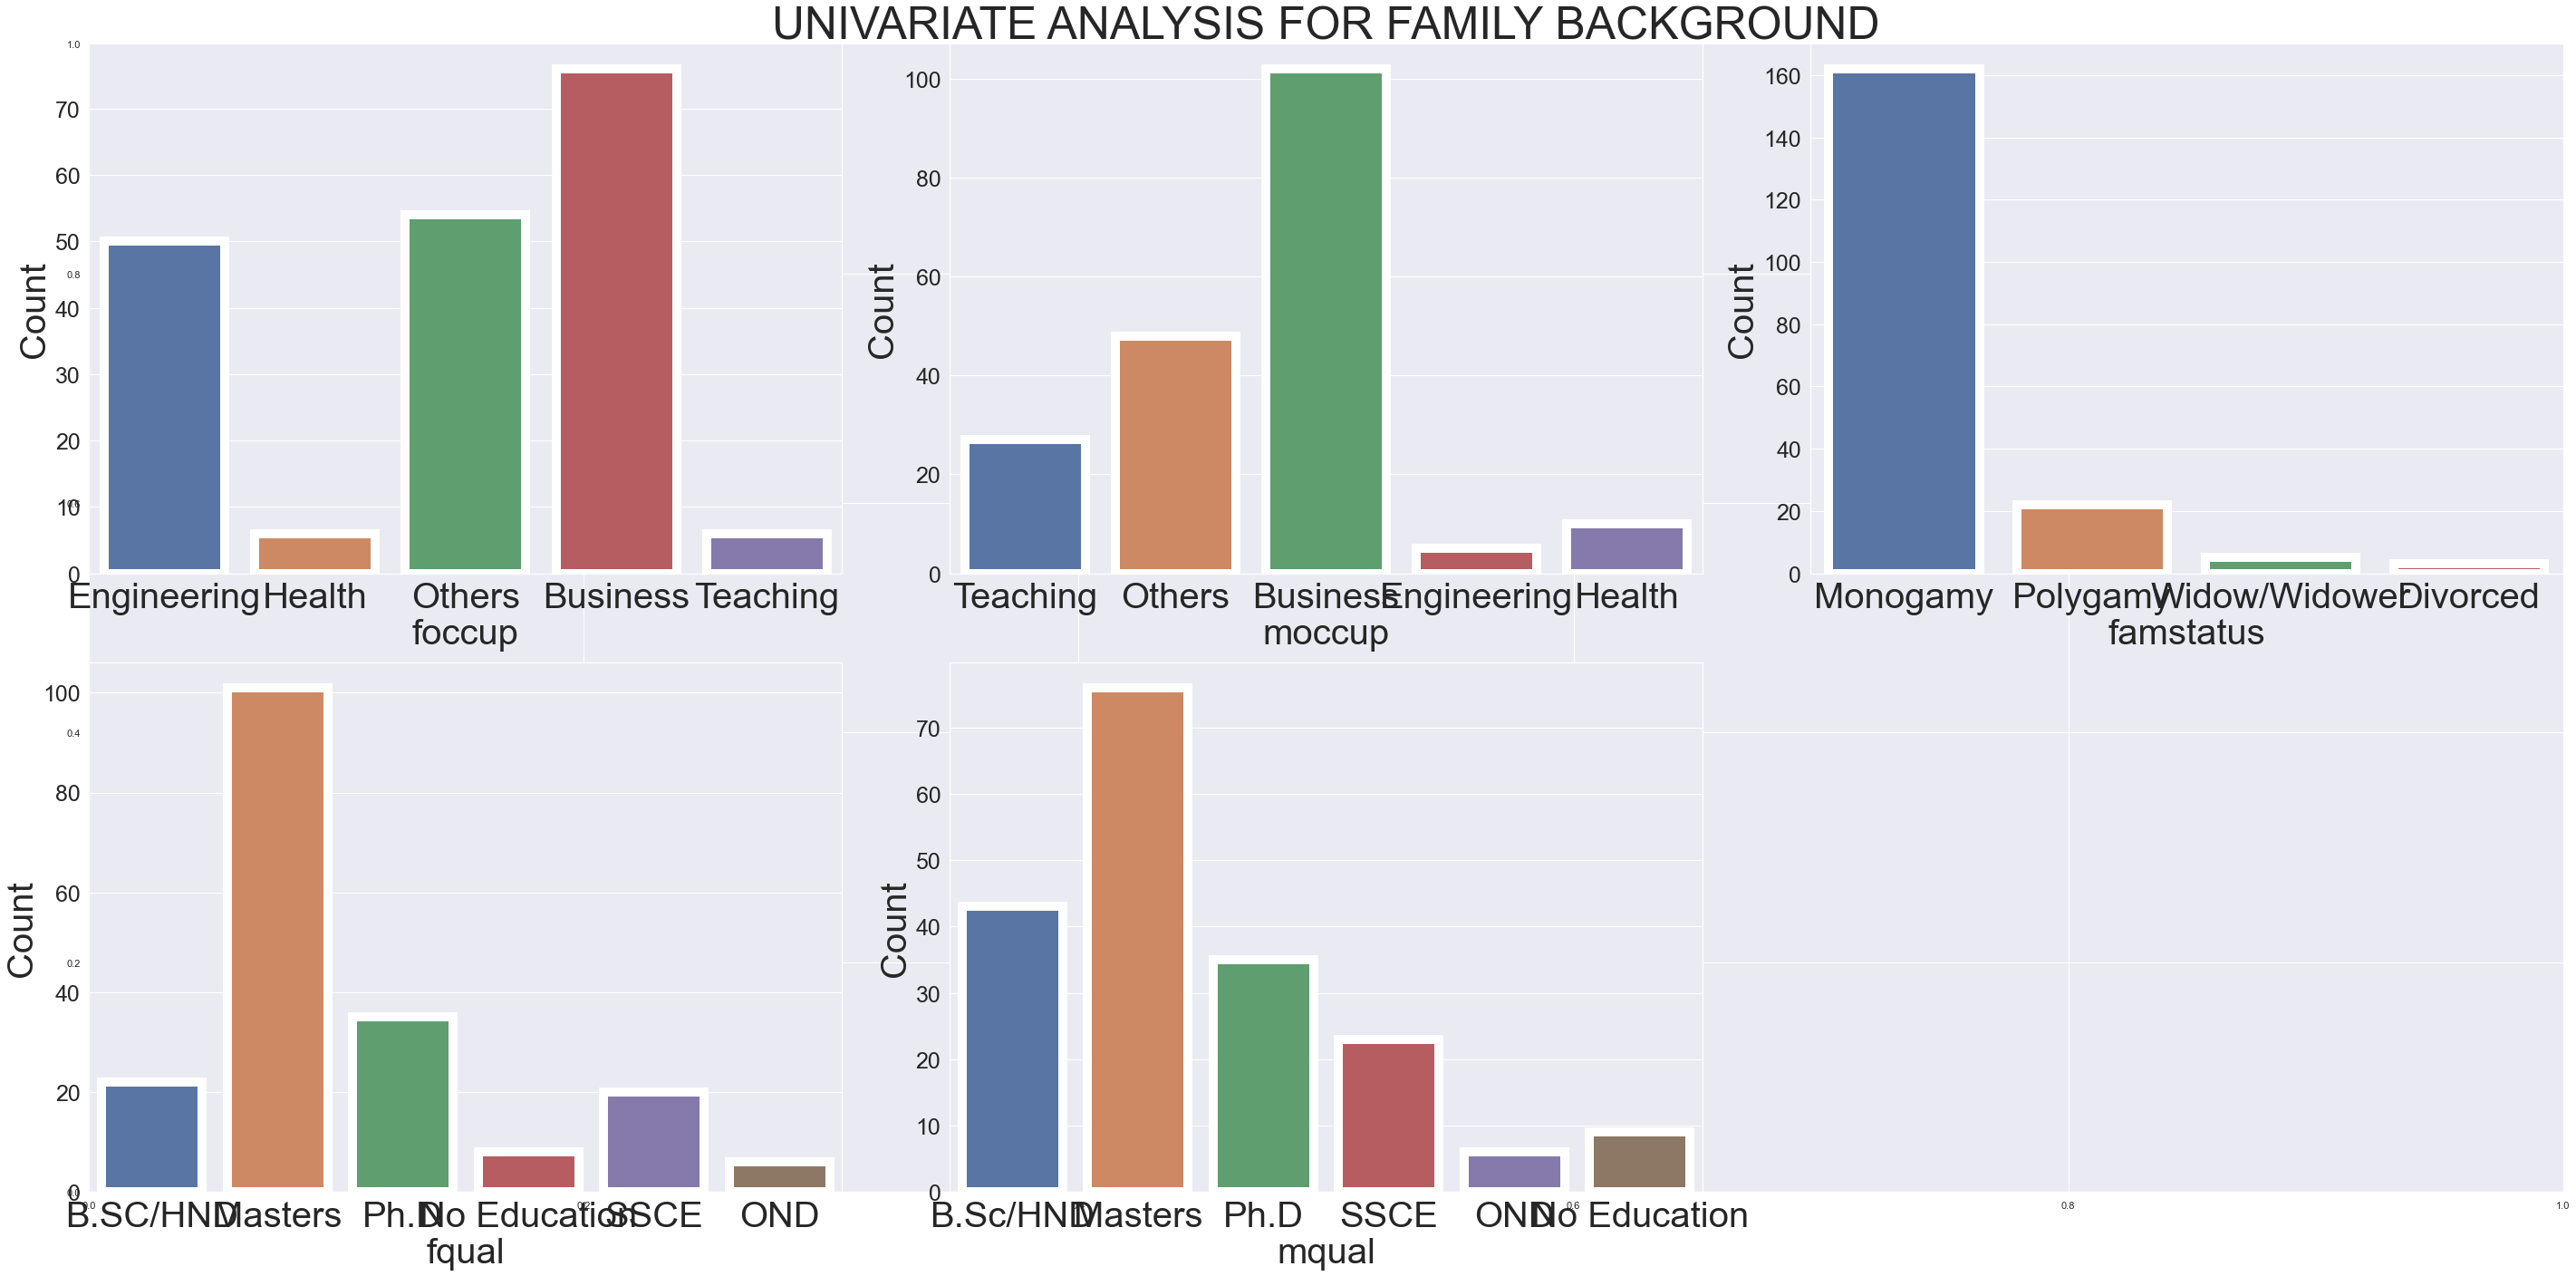

In [25]:
# univariate analysis the fam_cols features
fig = plt.figure(figsize=(40,20))

plt.title("UNIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size =  50)
for i, col in enumerate(fam_cols):
    ax1 = fig.add_subplot(2, 3, i+1)
    sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 40)
    
    ax1.tick_params(axis = 'x', labelsize = 40)
    ax1.tick_params(axis = 'y', labelsize = 25)
plt.tight_layout()
plt.savefig("fam_background.png")

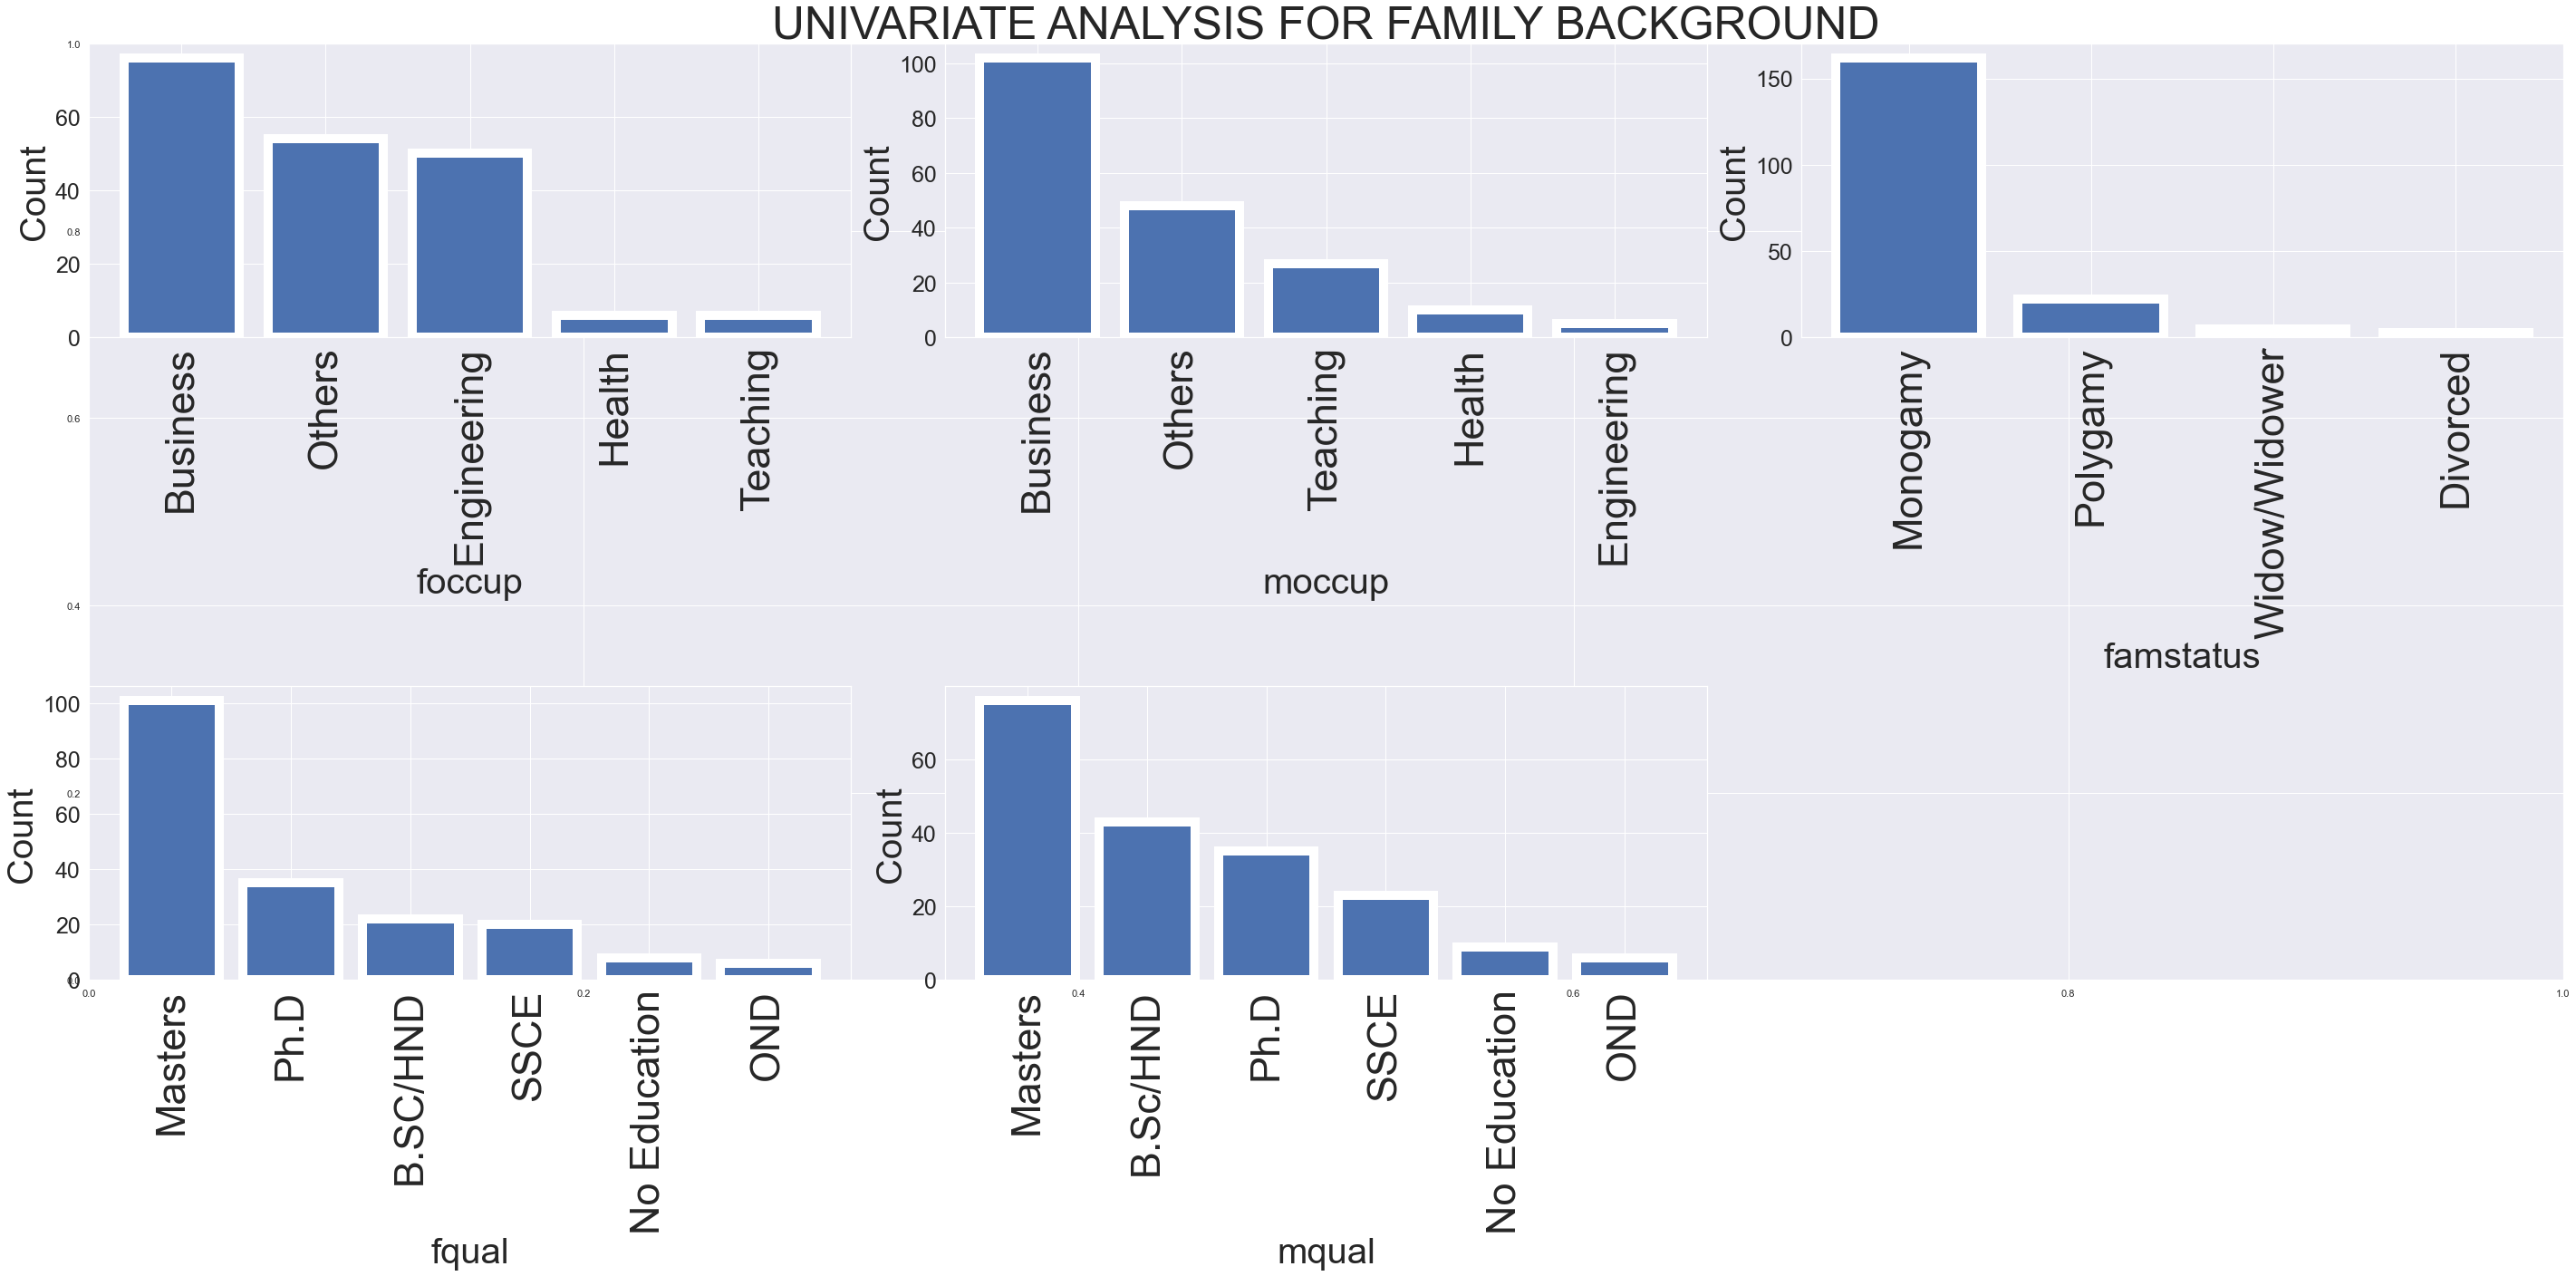

In [26]:
# univariate analysis the fam_cols features

fig = plt.figure(figsize=(40, 20))
plt.title("UNIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size=50)

for i, col in enumerate(fam_cols):
    ax1 = fig.add_subplot(2, 3, i+1)
    
    
    counts = df[col].value_counts()
    x = counts.index
    y = counts.values
    ax1.bar(x, y, linewidth=10)
    
    ax1.set_xlabel(col, fontsize=40)
    ax1.set_ylabel('Count', fontsize=40)
    
    ax1.tick_params(axis='x', labelsize=45, rotation = 90)
    ax1.tick_params(axis='y', labelsize=25)
    
plt.tight_layout()
plt.savefig("fam_background.png")


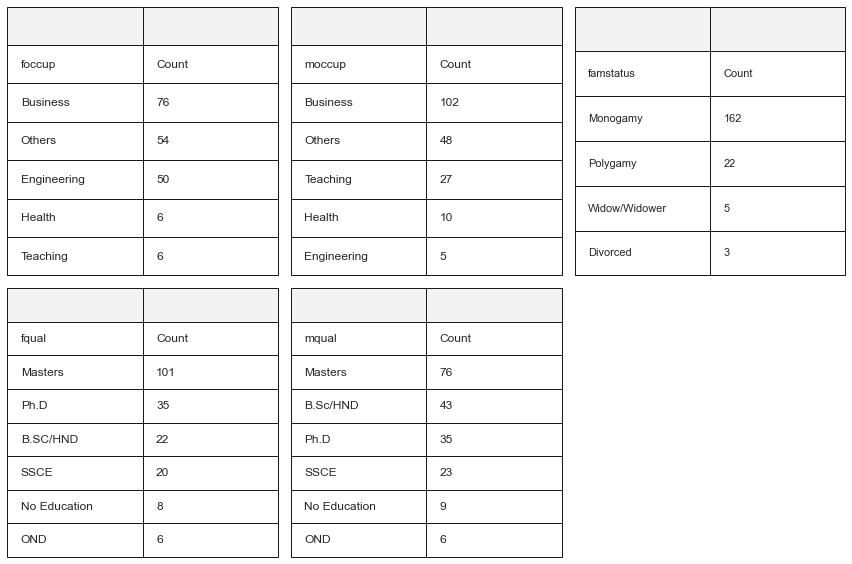

In [27]:
# univariate analysis the fam_cols features in tabular form
fig = plt.figure(figsize=(12, 8))
#plt.title("UNIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size=20)

for i, col in enumerate(fam_cols):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']

    ax1 = fig.add_subplot(2, 3, i+1)
    
    # Create the table using Matplotlib's table function
    table_data = [counts.columns] + counts.values.tolist()
    ax1.axis('off')  # Turn off axis for the table plot
    ax1.table(cellText=table_data, colLabels=None, loc='center', colColours=["#f3f3f3"] * len(counts.columns),
              cellLoc='left', bbox=[0, 0, 1, 1], fontsize = 30)
    #ax1.set_title(col, fontsize=15, pad=10)  # Add pad to reduce spacing between title and table

plt.tight_layout()
plt.savefig("fam_background_table.png")


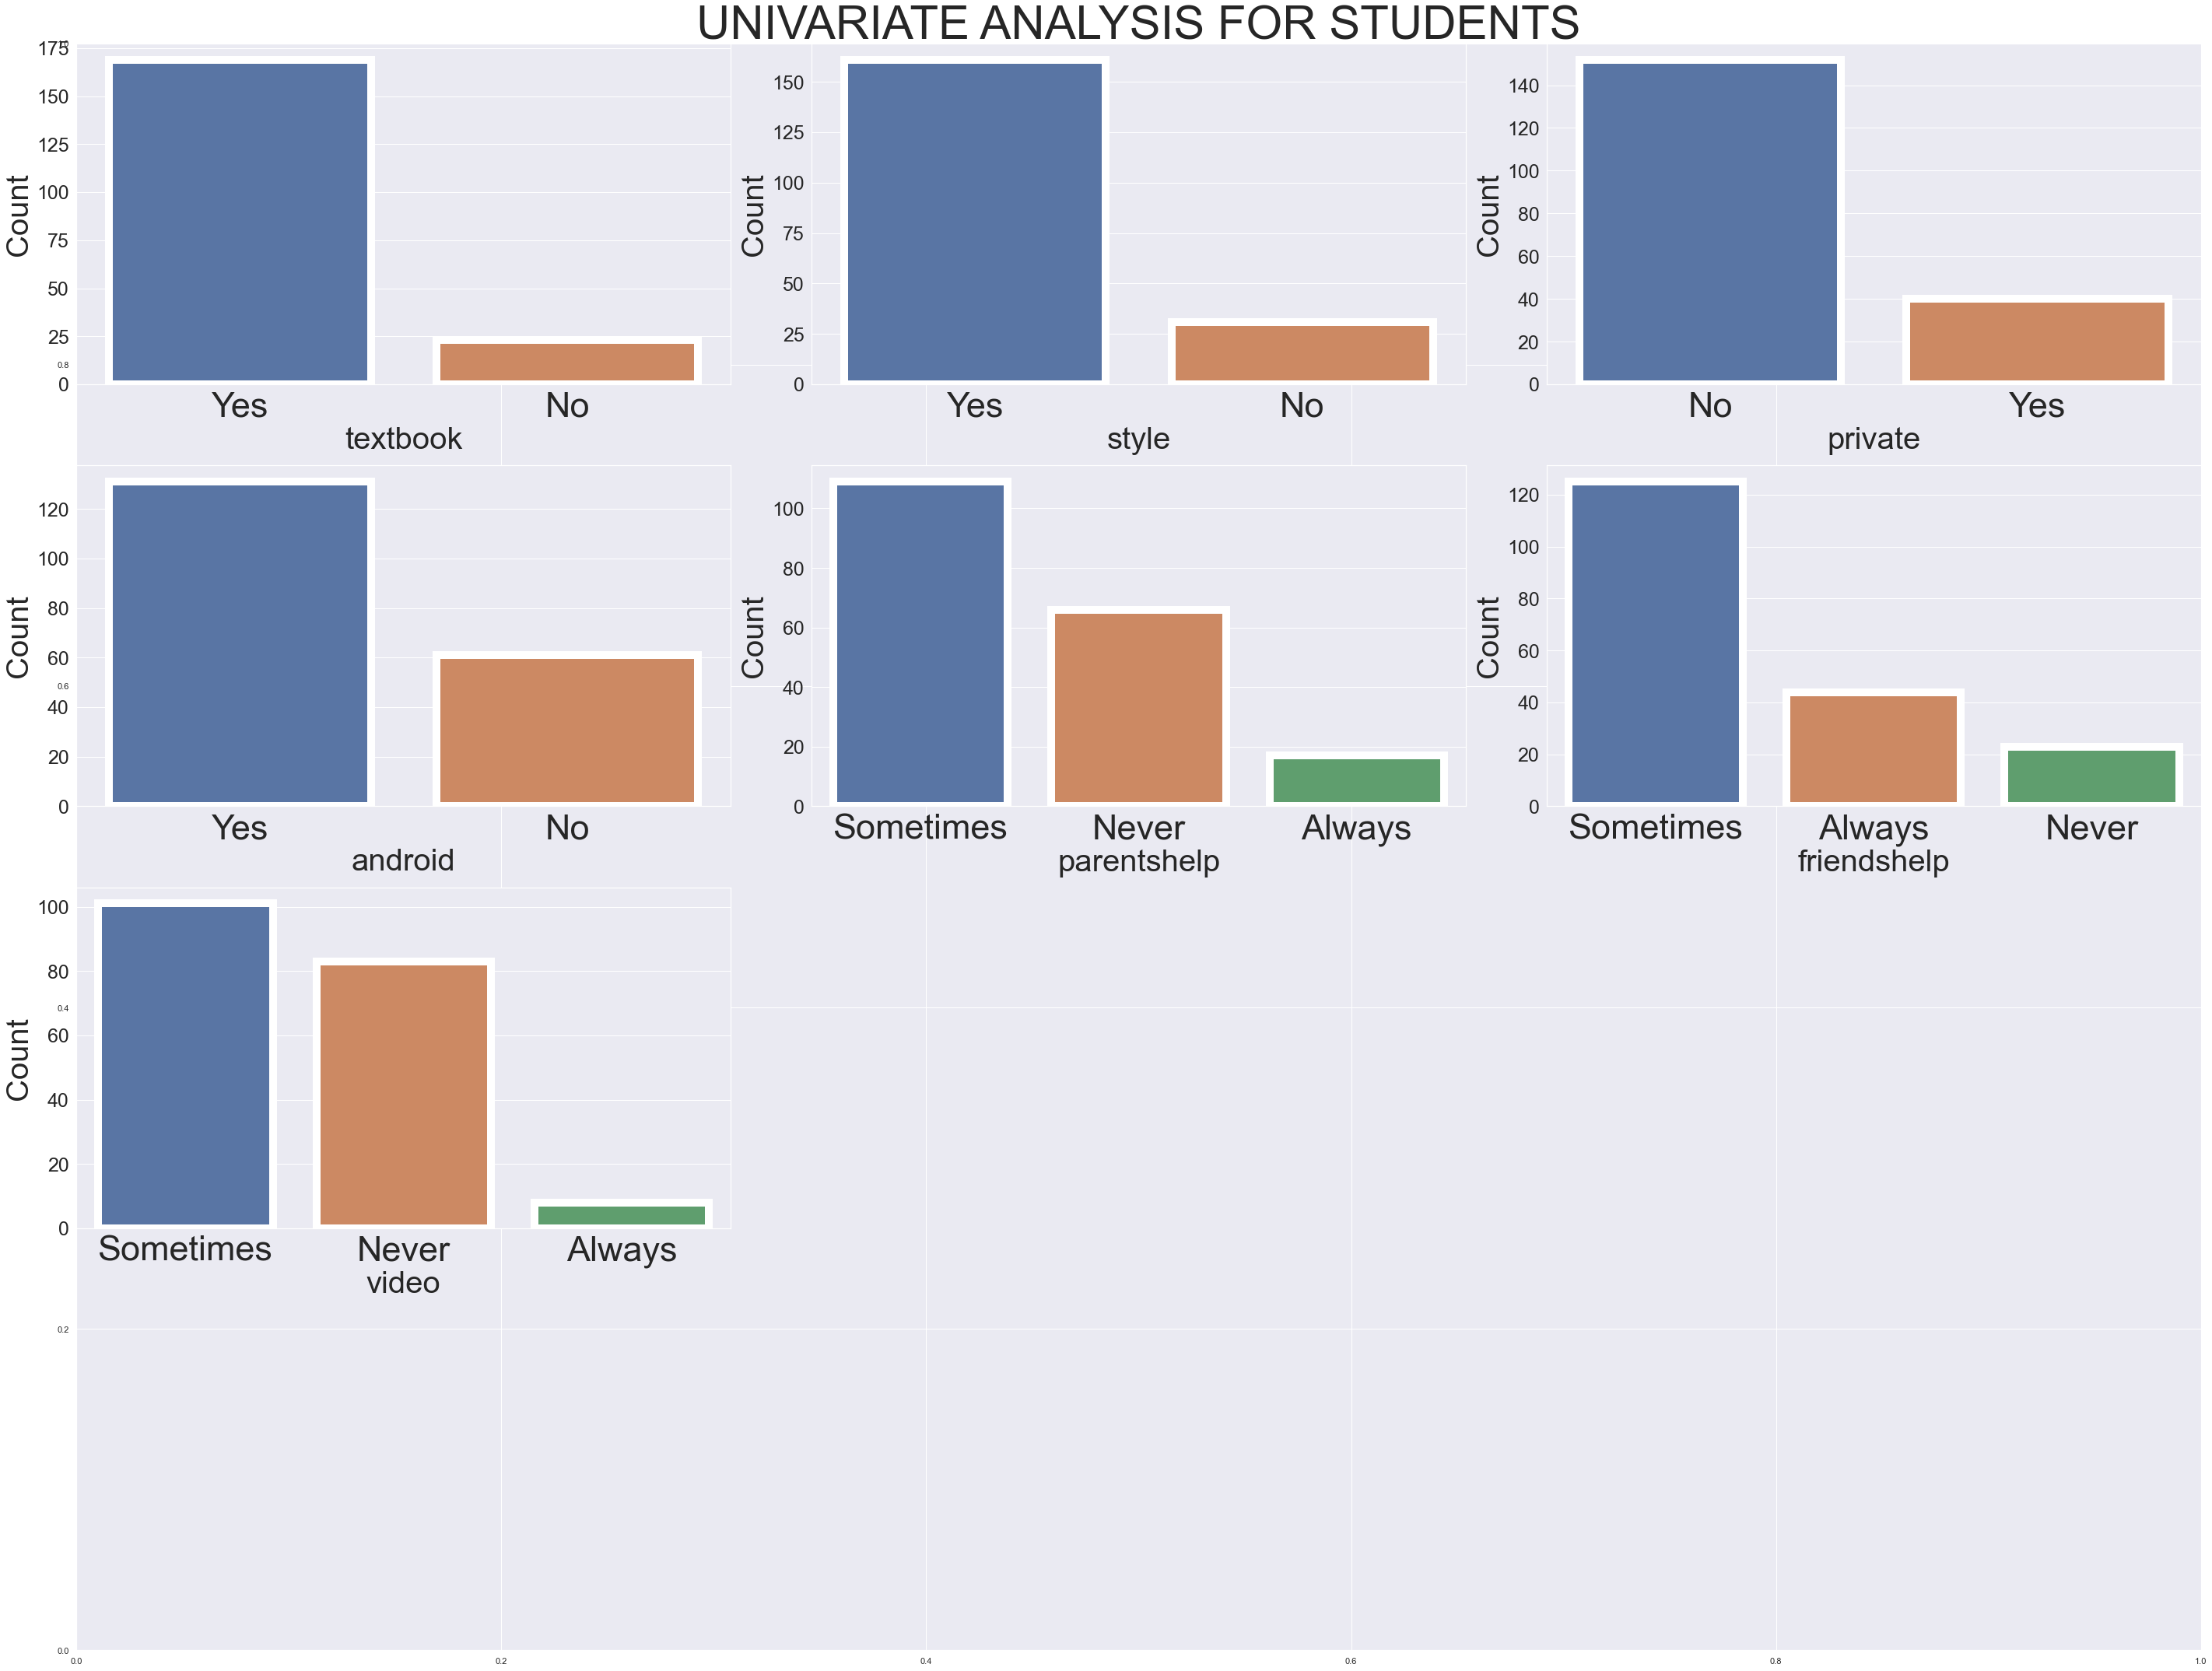

In [28]:
# univariate analysis for the stu_cols features

fig = plt.figure(figsize=(40,30))

plt.title("UNIVARIATE ANALYSIS FOR STUDENTS", size =  60)
for i, col in enumerate(stu_cols):
    ax1 = fig.add_subplot(4, 3, i+1)
    sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 40)
    
    ax1.tick_params(axis = 'x', labelsize = 45)
    ax1.tick_params(axis = 'y', labelsize = 25)
plt.tight_layout()
plt.savefig("stu_background.png")

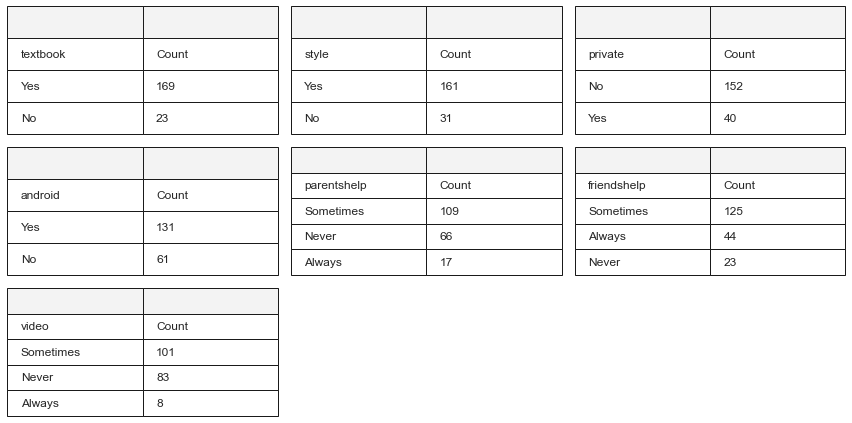

In [29]:
# univariate analysis for the stu_cols features tabularly

fig = plt.figure(figsize=(12, 8))
#plt.title("UNIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size=20)

for i, col in enumerate(stu_cols):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']

    ax1 = fig.add_subplot(4, 3, i+1)
    
    # Create the table using Matplotlib's table function
    table_data = [counts.columns] + counts.values.tolist()
    ax1.axis('off')  # Turn off axis for the table plot
    ax1.table(cellText=table_data, colLabels=None, loc='center', colColours=["#f3f3f3"] * len(counts.columns),
              cellLoc='left', bbox=[0, 0, 1, 1], fontsize = 30)
    #ax1.set_title(col, fontsize=15, pad=10)  # Add pad to reduce spacing between title and table

plt.tight_layout()
plt.savefig("stu_background_table.png")


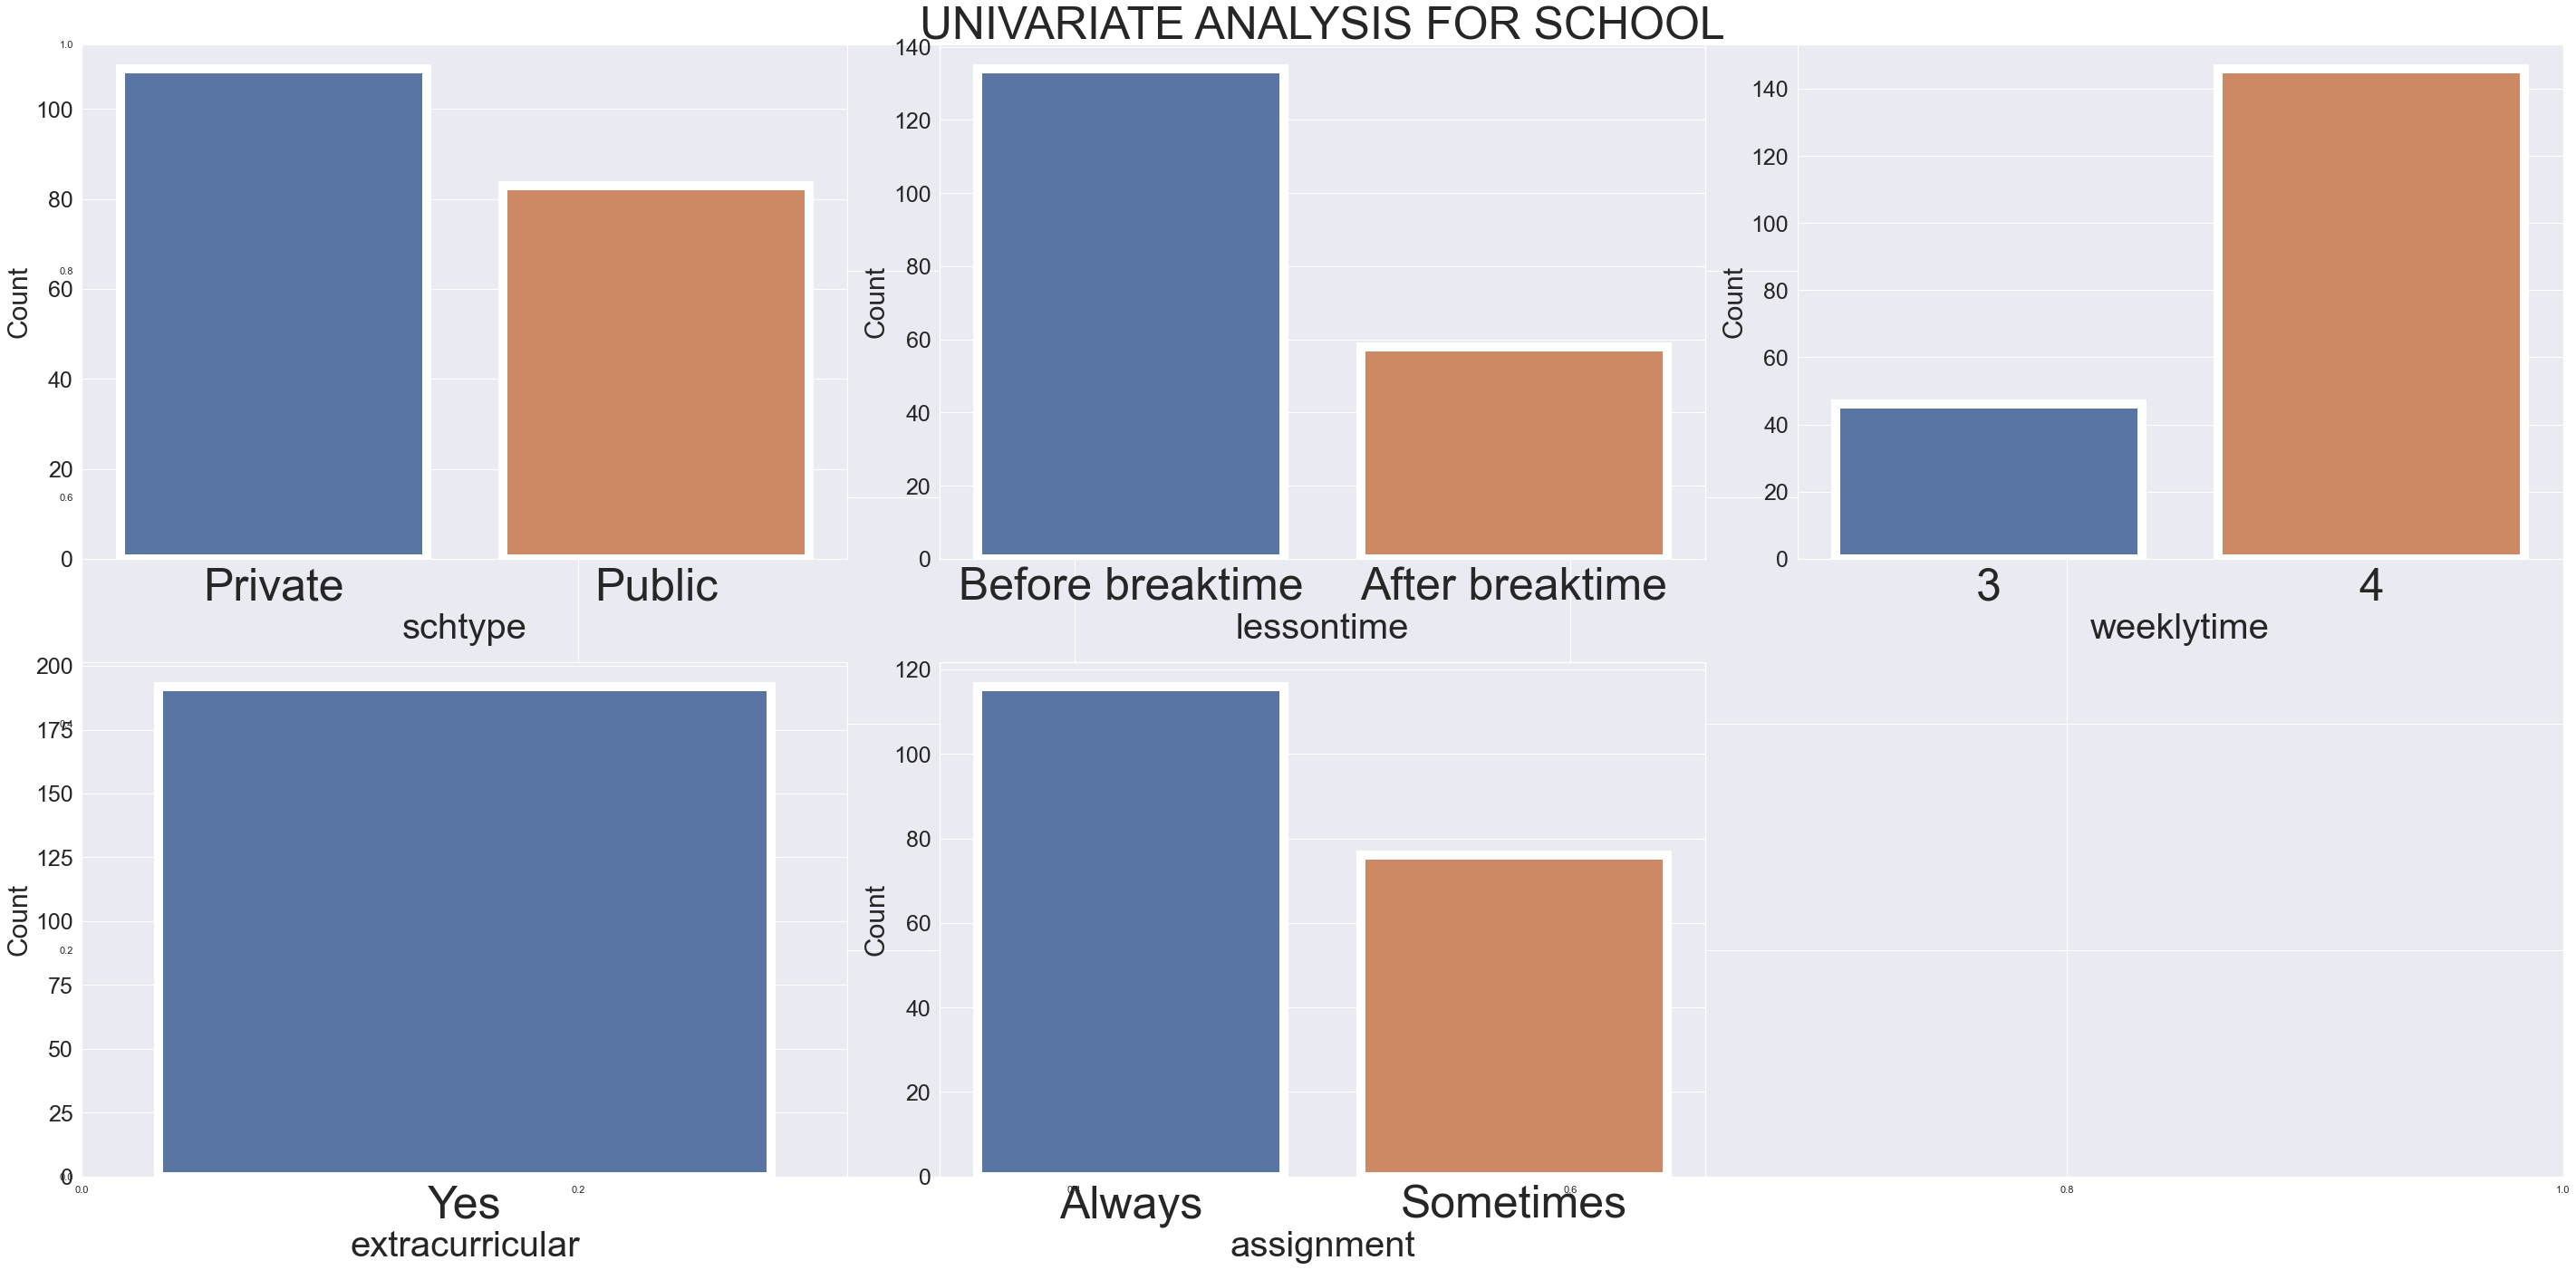

In [30]:
# univariate analysis for the sch_cols features
fig = plt.figure(figsize=(40,20))

plt.title("UNIVARIATE ANALYSIS FOR SCHOOL", size =  50)
for i, col in enumerate(sch_cols):
    ax1 = fig.add_subplot(2, 3, i+1)
    sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 50)
    ax1.tick_params(axis = 'y', labelsize = 25)
plt.tight_layout()
plt.savefig("sch_background.png")

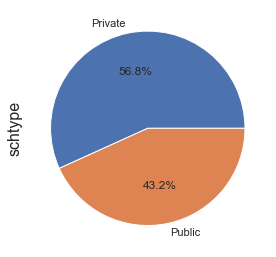

In [31]:
#pie chart for the schtype feature
fig, ax = plt.subplots(figsize=(4, 6))
df["schtype"].value_counts().plot(kind= 'pie', autopct = '%.1f%%')
#ax.set_title('Sport Popularity')
plt.tight_layout()

In [32]:
df.skew().sort_values(ascending=False)

school        0.199893
age           0.102415
score        -0.102207
weeklytime   -1.229868
dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='schtype', ylabel='score'>

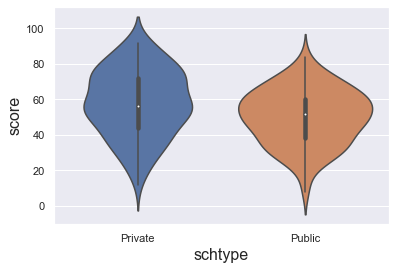

In [33]:
#violin plot for the schtype against the score
sns.violinplot(x='schtype', y='score', data = df)

In [34]:
#extracurricular column was removed
sch_cols.remove("extracurricular")

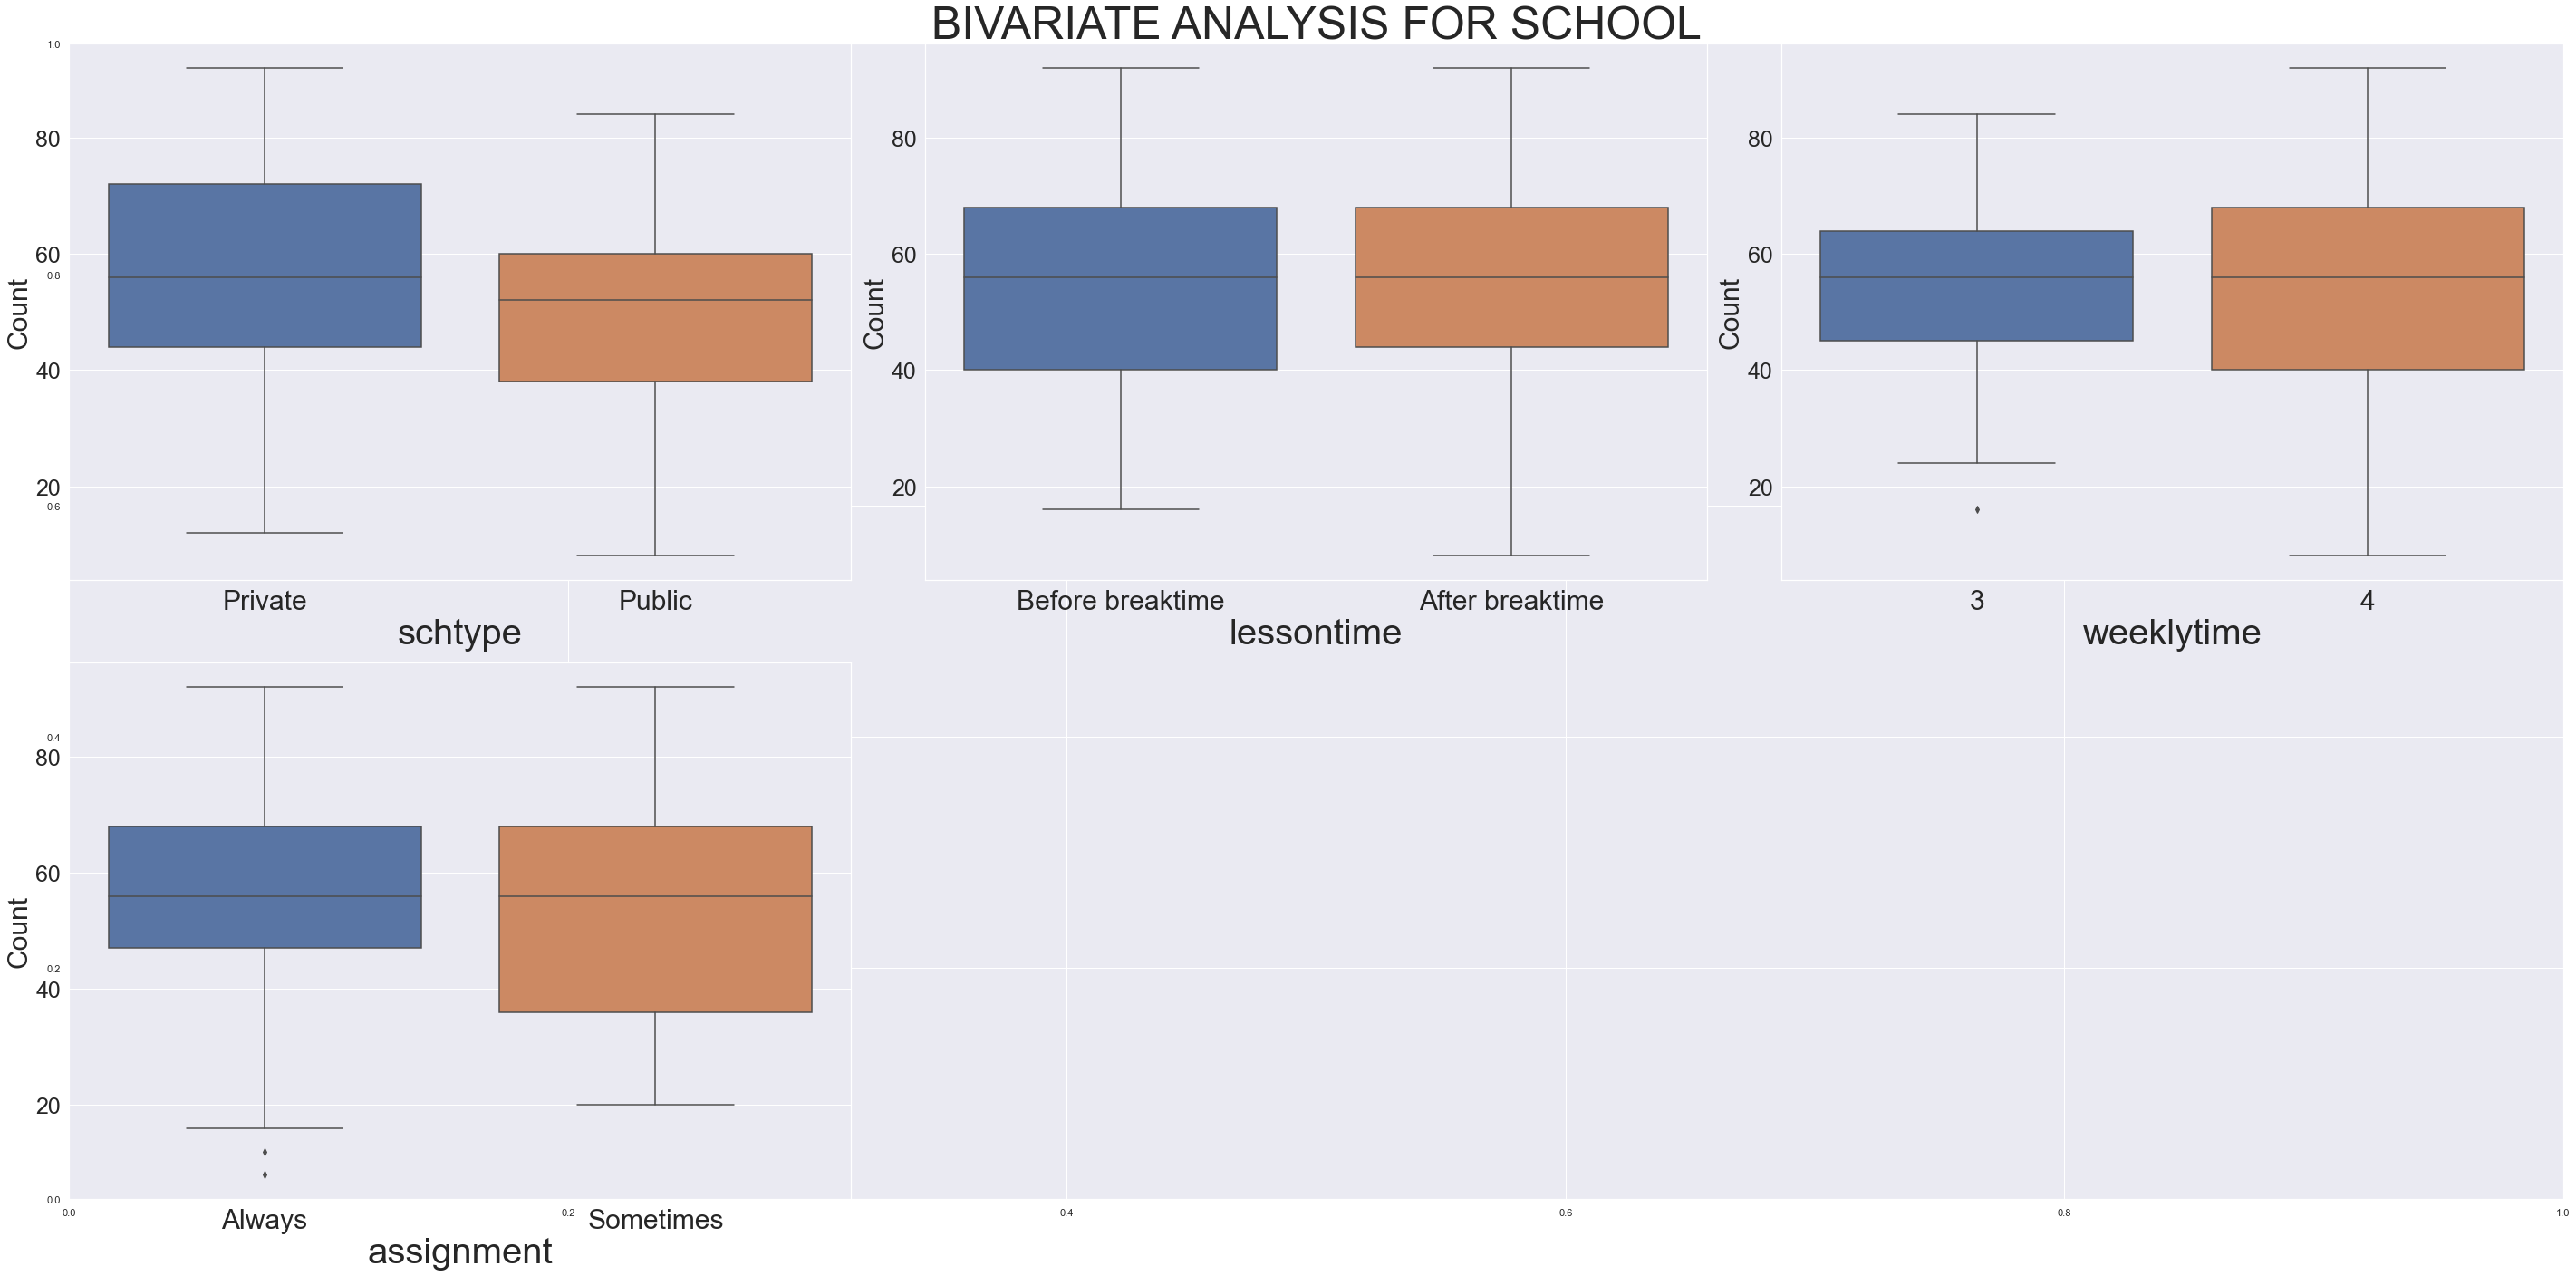

In [35]:
#boxplot for the school feature column against the score feature
fig = plt.figure(figsize=(40,20))

plt.title("BIVARIATE ANALYSIS FOR SCHOOL", size =  50)
for i, col in enumerate(sch_cols):
    ax1 = fig.add_subplot(2, 3, i+1)
    #sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    sns.boxplot(x = col, y = 'score', data = df, ax = ax1)
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 30)
    ax1.tick_params(axis = 'y', labelsize = 25)
plt.tight_layout()

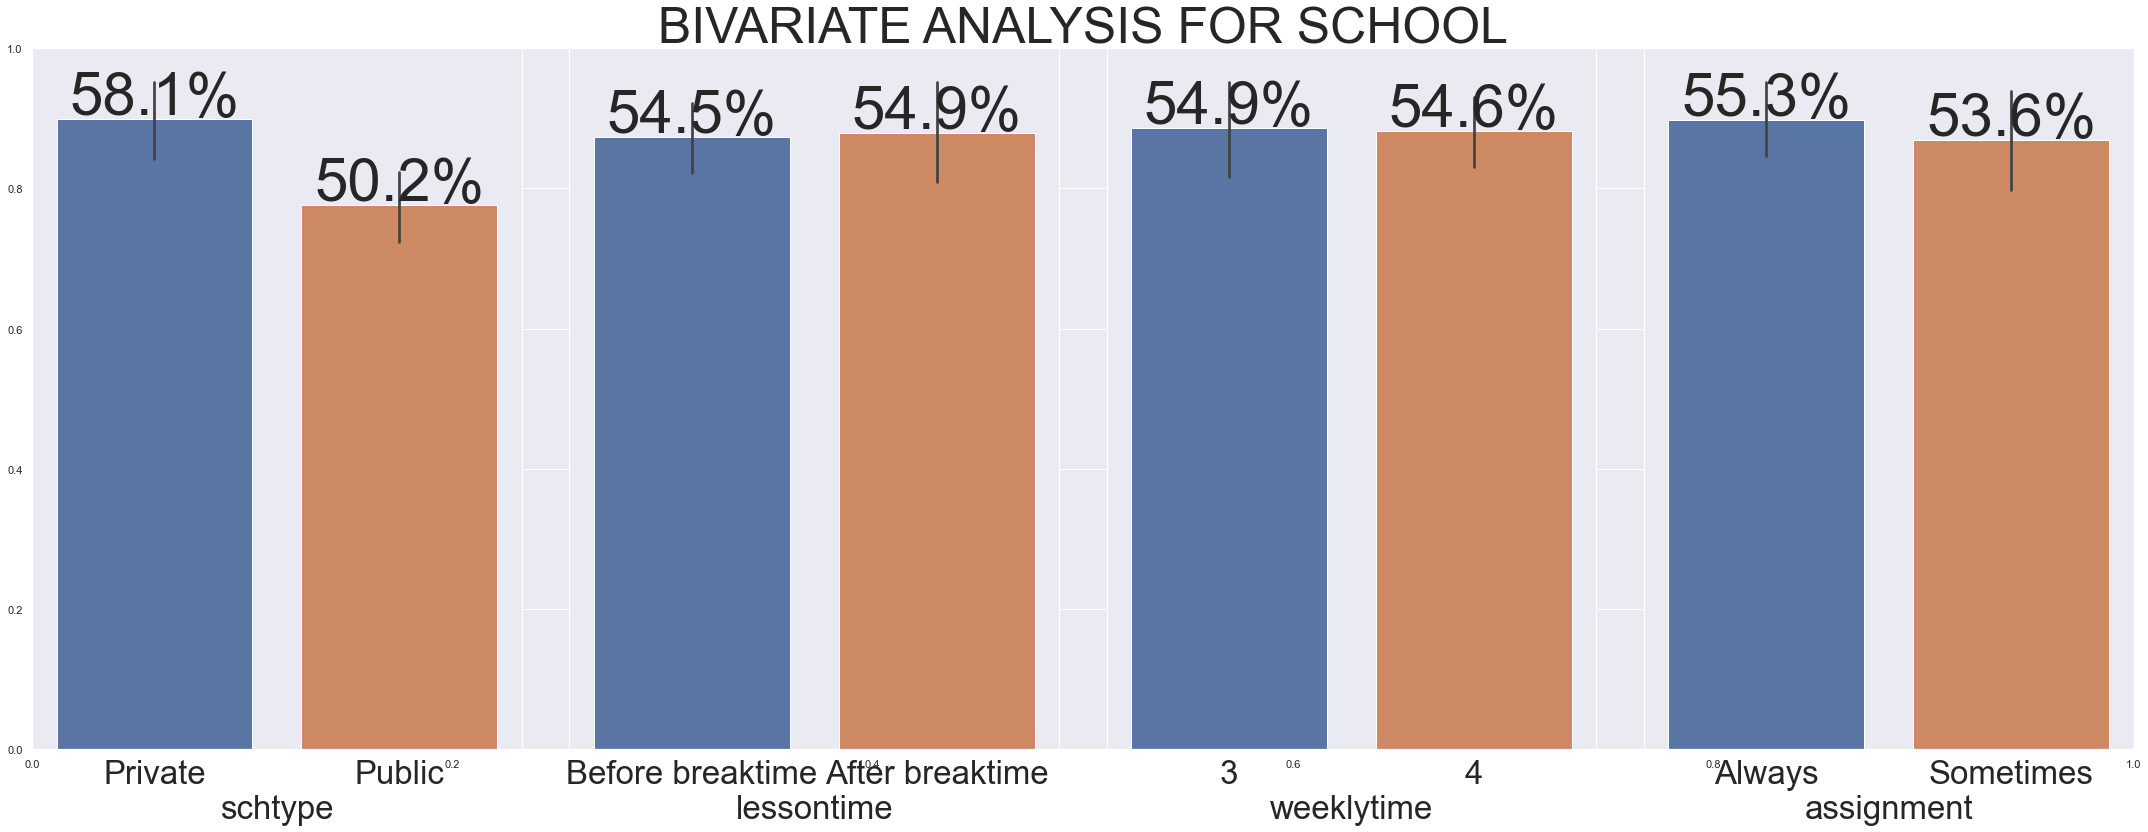

In [36]:
#visualising the bivariate analysis for the sch_cols features
fig = plt.figure(figsize=(30,12))

plt.title("BIVARIATE ANALYSIS FOR SCHOOL", size =  50)
for i, col in enumerate(sch_cols):
    ax1 = fig.add_subplot(1, 4, i+1)
    #plt.ylim(0,100)
    #sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    sns.barplot(x = col, y = 'score', data = df, ax = ax1)
    
    for p in ax1.patches:
        y = p.get_height()
        x = p.get_x() + p.get_width() / 2

    # Label of bar height
        label = "{:.1f}%".format(y)

    # Annotate plot
        ax1.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize = 60)

# Remove y axis
    ax1.get_yaxis().set_visible(False)
    
    ax1.set_xlabel(col, fontsize = 33)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 33)
    ax1.tick_params(axis = 'y', labelsize = 25)
    
plt.tight_layout()
plt.savefig("sch_multi")

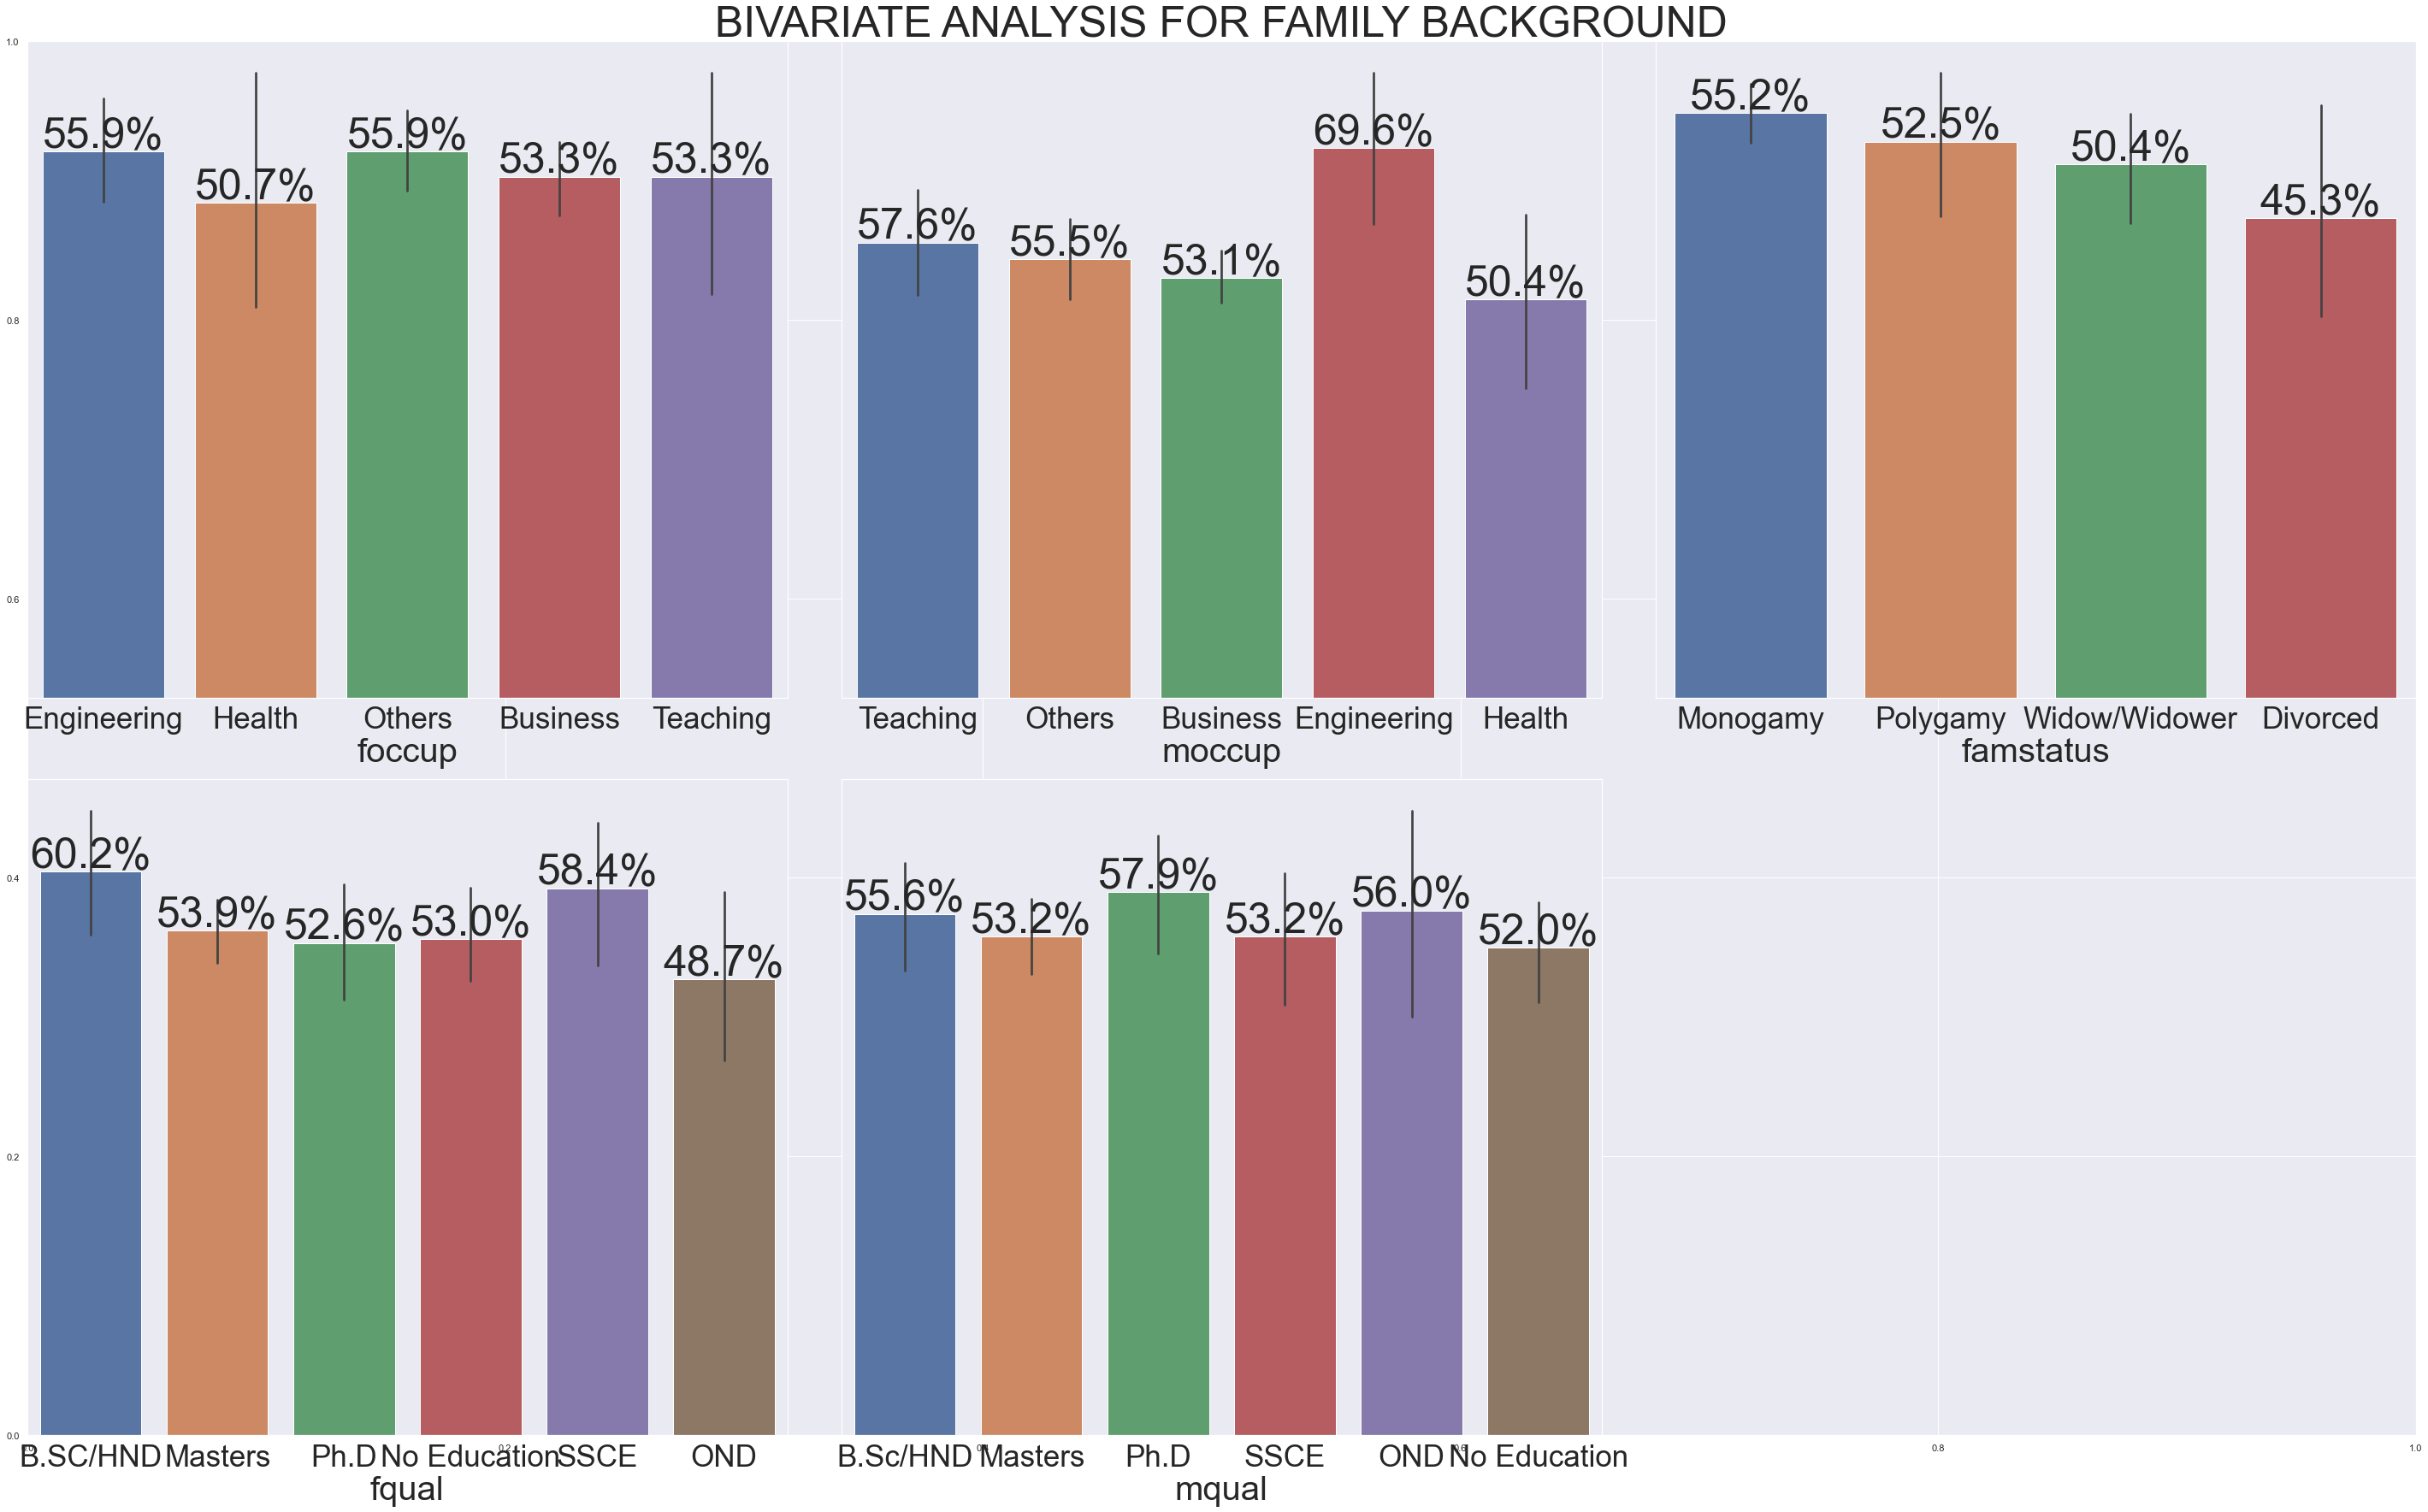

In [37]:
#visualising the bivariate analysis for the fam_cols features
fig = plt.figure(figsize=(40,25))

plt.title("BIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size =  50)
for i, col in enumerate(fam_cols):
    ax1 = fig.add_subplot(2, 3, i+1)
    #plt.ylim(0,100)
    #sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    sns.barplot(x = col, y = 'score', data = df, ax = ax1)
    
    for p in ax1.patches:
        y = p.get_height()
        x = p.get_x() + p.get_width() / 2

    # Label of bar height
        label = "{:.1f}%".format(y)

    # Annotate plot
        ax1.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize = 50)

# Remove y axis
    ax1.get_yaxis().set_visible(False)
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 35)
    ax1.tick_params(axis = 'y', labelsize = 25)
    
plt.tight_layout()
plt.savefig("fam_multi")

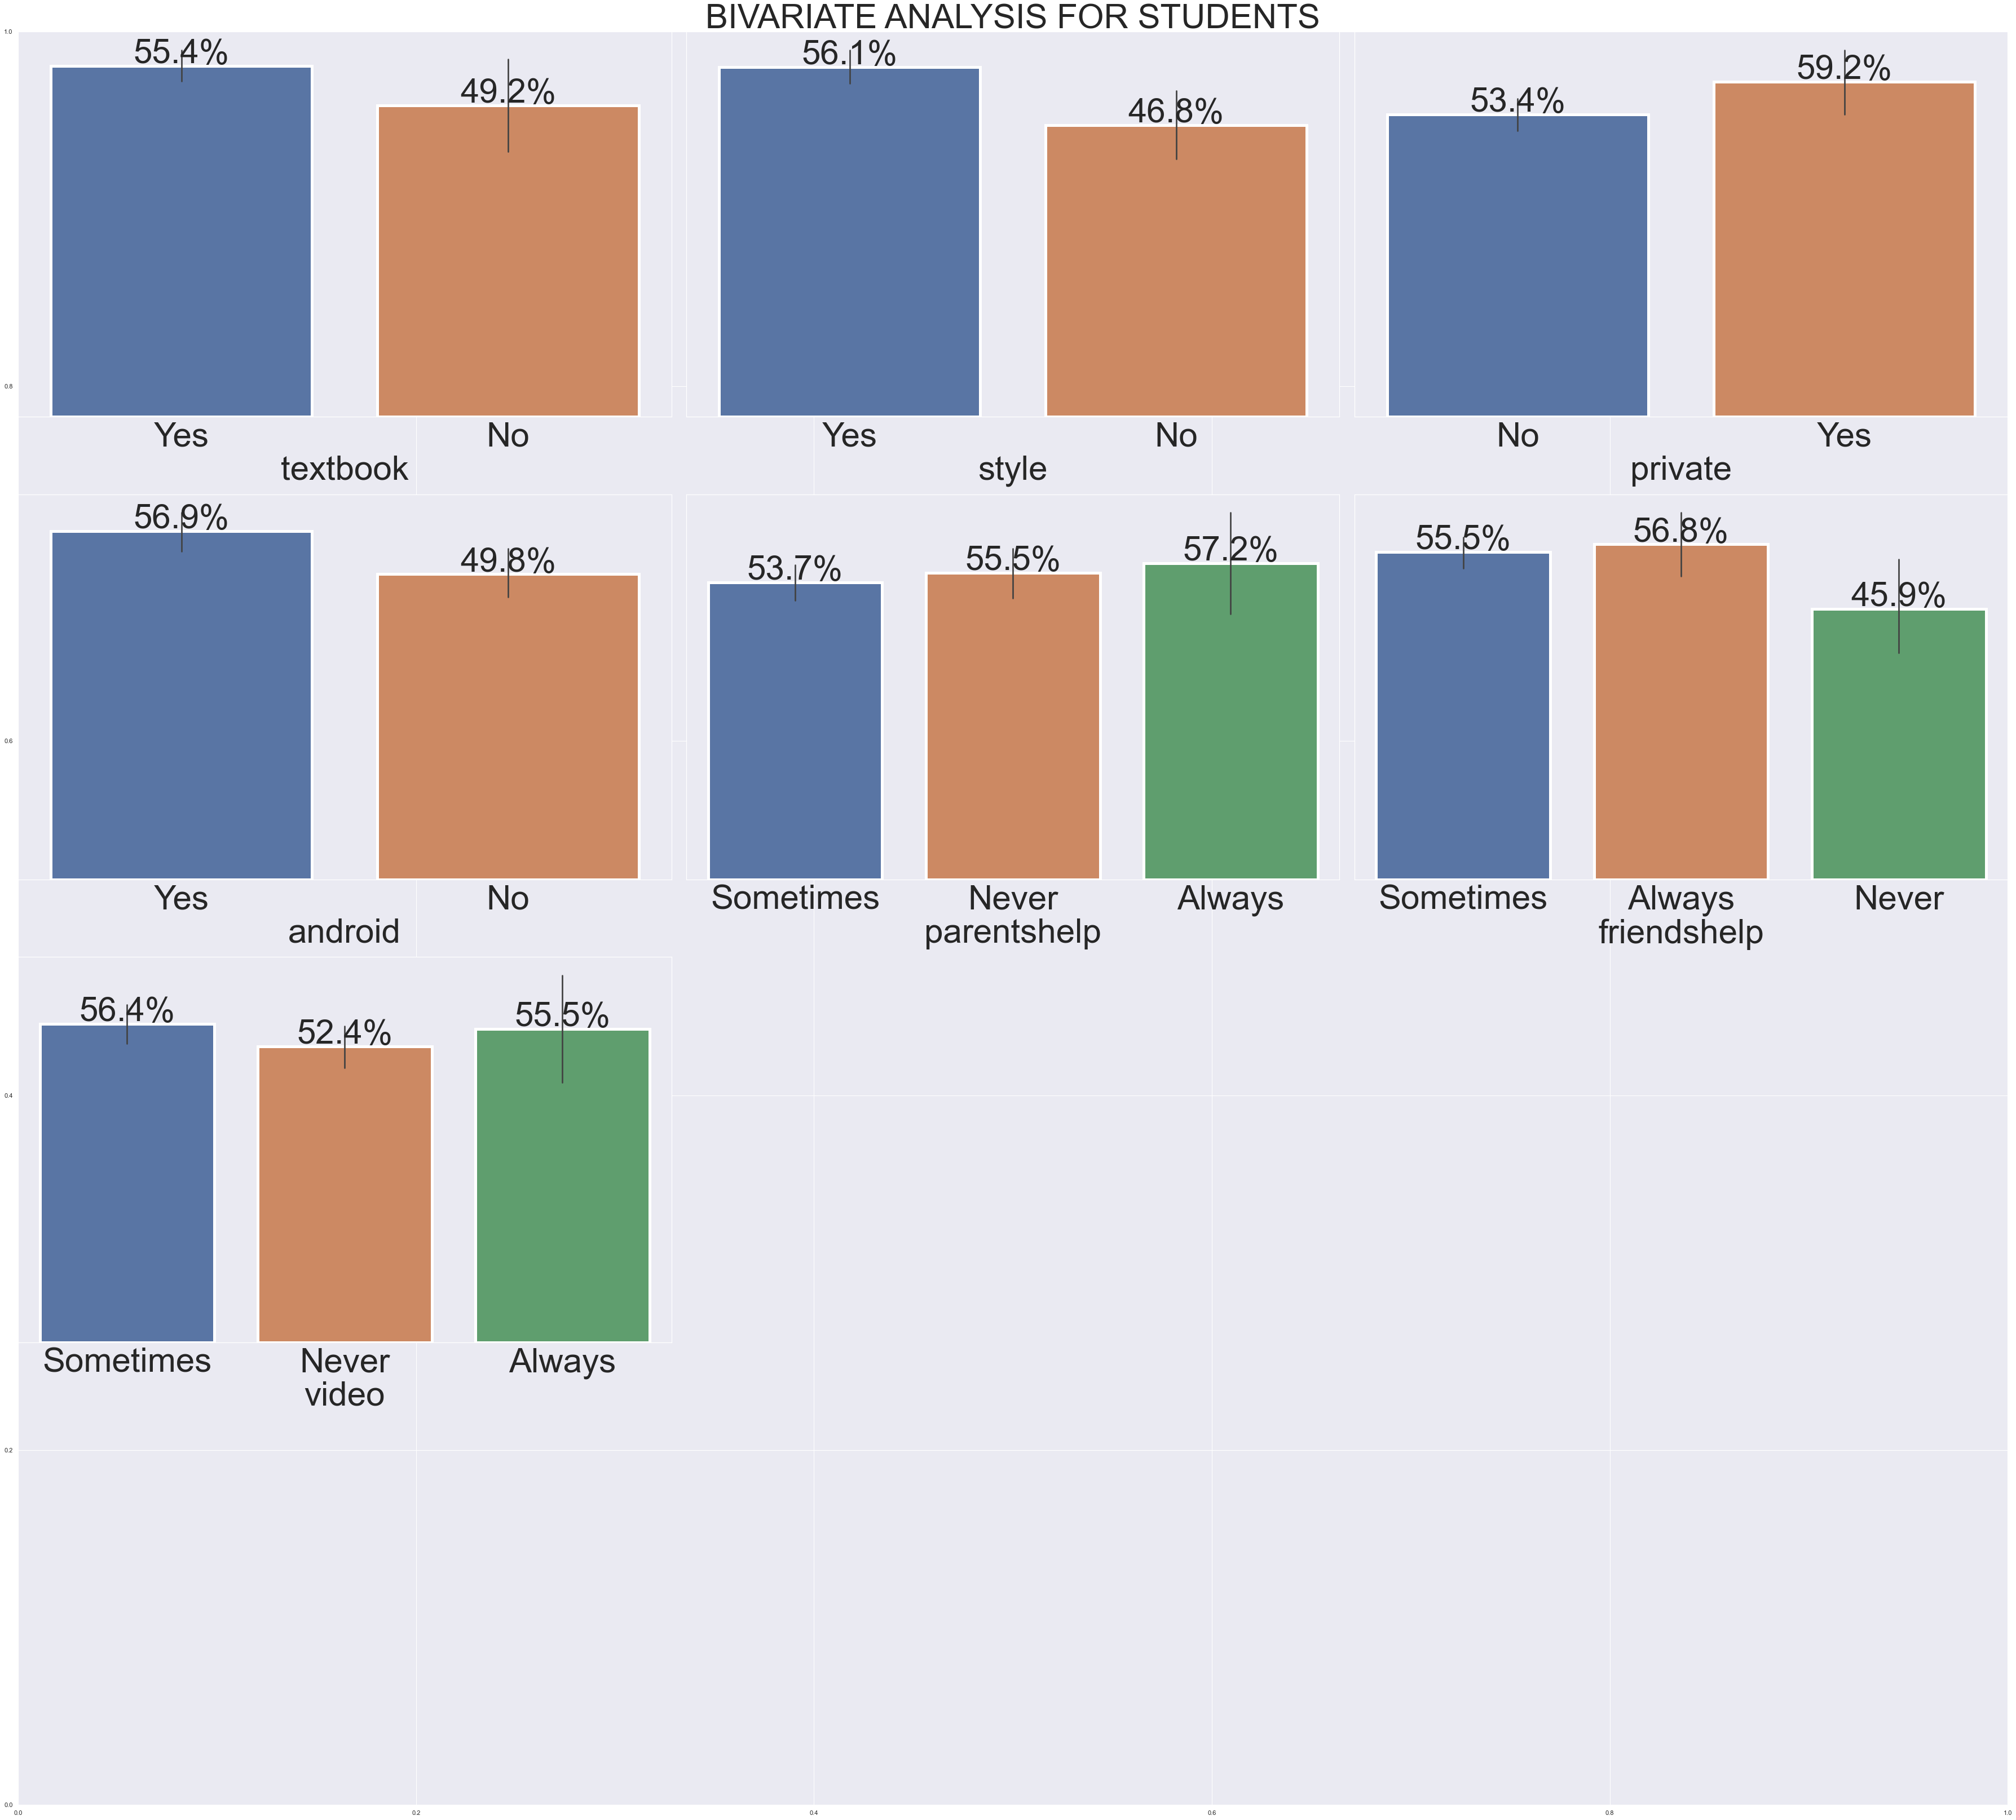

In [38]:
#visualising the bivariate analysis for the stu_cols features
fig = plt.figure(figsize=(50,45))

plt.title("BIVARIATE ANALYSIS FOR STUDENTS", size =  60)
for i, col in enumerate(stu_cols):
    ax1 = fig.add_subplot(4, 3, i+1)
    #plt.ylim(0,100)
    #sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    sns.barplot(x = col, y = 'score', data = df, ax = ax1, linewidth = 5)
    
    for p in ax1.patches:
        y = p.get_height()
        x = p.get_x() + p.get_width() / 2

    # Label of bar height
        label = "{:.1f}%".format(y)

    # Annotate plot
        ax1.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize = 60)

# Remove y axis
    ax1.get_yaxis().set_visible(False)
    
    ax1.set_xlabel(col, fontsize = 60)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 60)
    ax1.tick_params(axis = 'y', labelsize = 25)
    
plt.tight_layout()
plt.savefig("stu_multi")

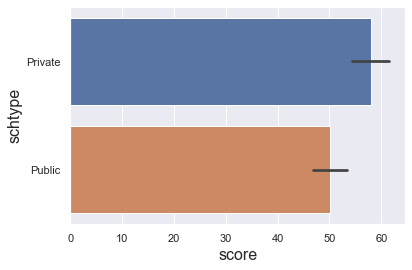

<Figure size 2880x1080 with 0 Axes>

In [39]:
#school type against the score
sns.barplot(x = df["score"], y = df["schtype"])
plt.figure(figsize=(40,15))
plt.show()

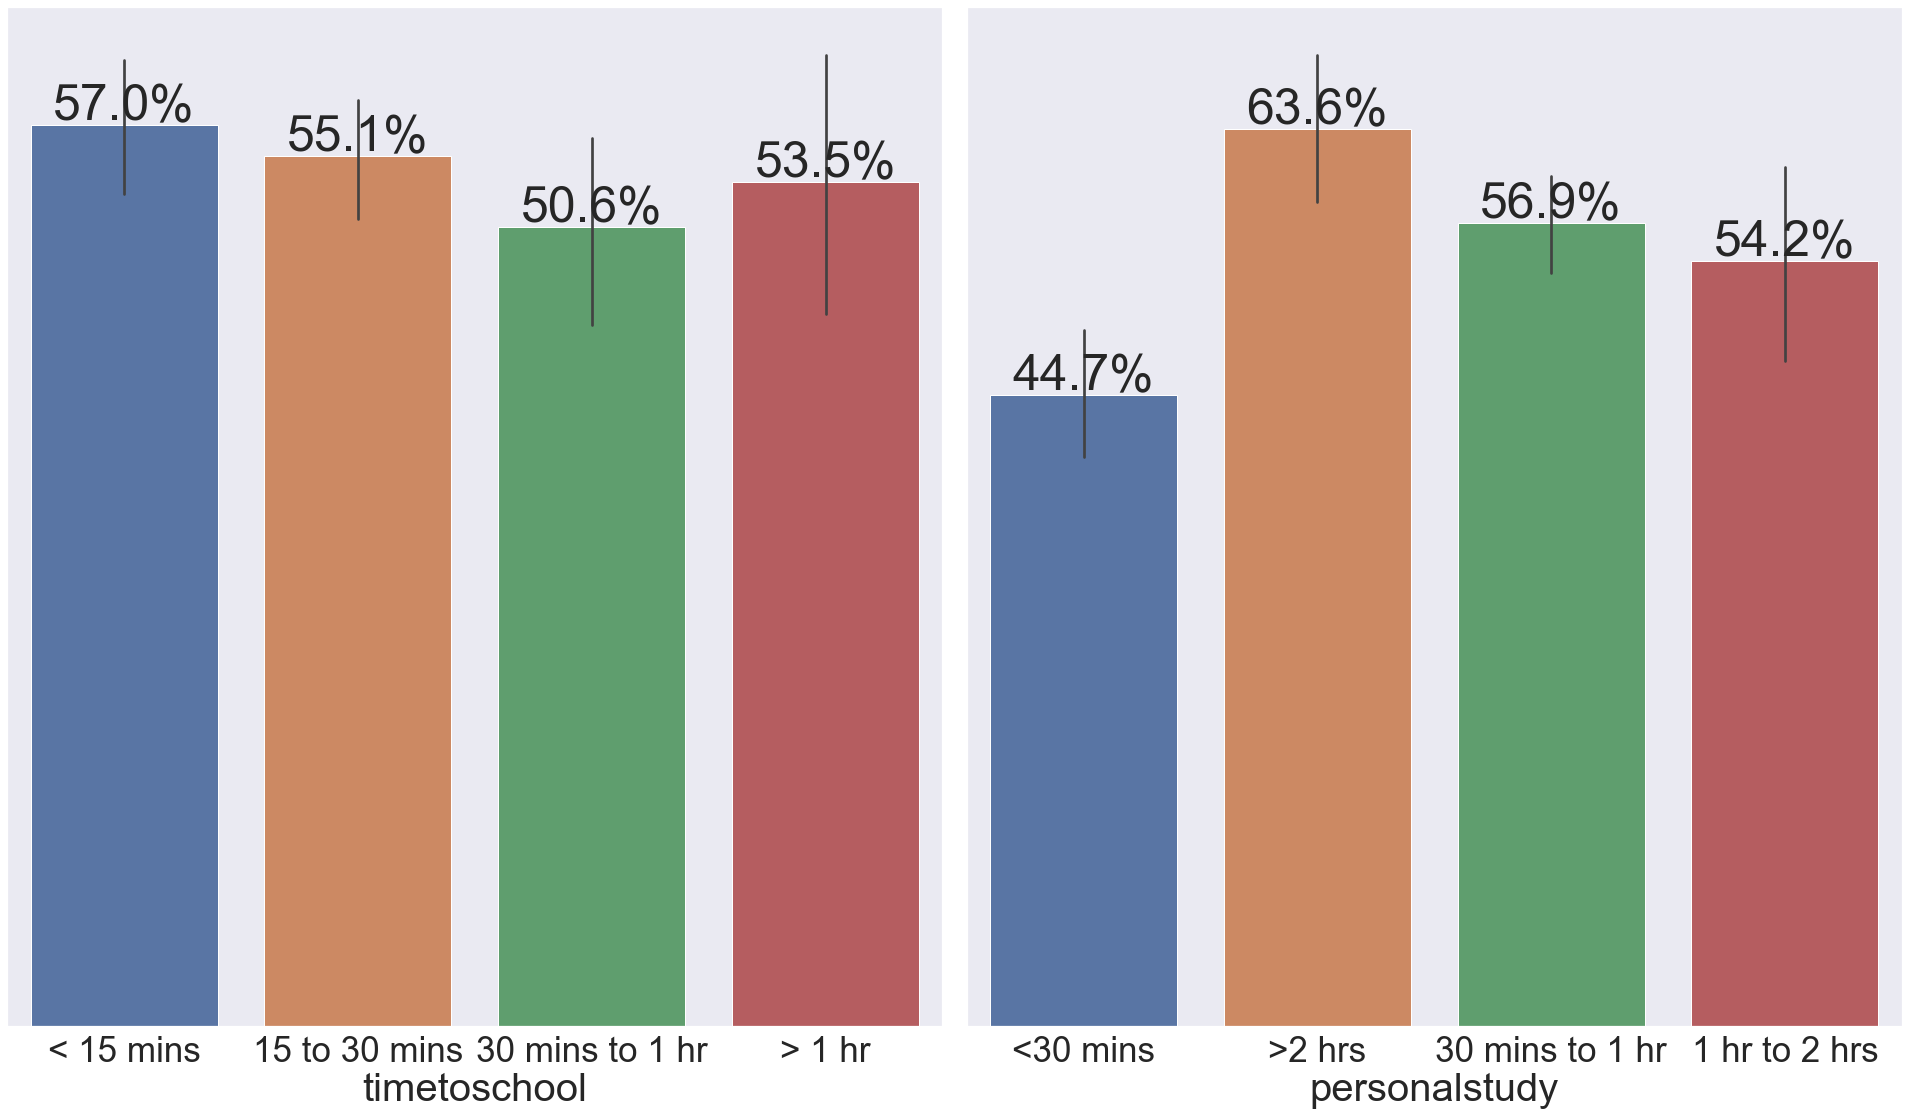

In [40]:
#bivariate analysis for the time features
time = ["timetoschool", "personalstudy"]
fig = plt.figure(figsize=(40,30))

#plt.title("MULTIVARIATE ANALYSIS FOR FAMILY BACKGROUND", size =  50)
for i, col in enumerate(time):
    ax1 = fig.add_subplot(2, 3, i+1)
    #plt.ylim(0,100)
    #sns.countplot(x = col, data = df, ax = ax1, linewidth = 10)
    sns.barplot(x = col, y = 'score', data = df, ax = ax1)
    
    for p in ax1.patches:
        y = p.get_height()
        x = p.get_x() + p.get_width() / 2

    # Label of bar height
        label = "{:.1f}%".format(y)

    # Annotate plot
        ax1.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize = 50)

# Remove y axis
    ax1.get_yaxis().set_visible(False)
    
    ax1.set_xlabel(col, fontsize = 40)
    ax1.set_ylabel('Count', fontsize = 30)
    
    ax1.tick_params(axis = 'x', labelsize = 35)
    ax1.tick_params(axis = 'y', labelsize = 25)
    
plt.tight_layout()
plt.savefig("time_multi")